### Step 1: Importing required Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
# for visulaization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing all datasets
df = pd.read_csv("Leads.csv")

###  Step 2: Inspecting the Dataframe

In [4]:
# Let's see the head of our  dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
df.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#checking unique number of values in each column

df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Checking for duplicate rows

df.duplicated().mean()

0.0

### Step 3: Data Preparation

####Treatment for 'Select' values

In [10]:
cols_with_select = df.apply(lambda x: (x == 'Select').any())
cols_with_select = cols_with_select[cols_with_select].index.tolist()

print(cols_with_select)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [11]:
df = df.replace('Select', np.nan)

In [12]:
cols_with_select = df.apply(lambda x: (x == 'Select').any())
cols_with_select = cols_with_select[cols_with_select].index.tolist()

print(cols_with_select)

[]


In [13]:
#Checking the Null values
100*(df.isna().mean()).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [14]:
#Drop Columns with more than 60% Null Values
df = df.loc[:, (df.isnull().mean() < 0.4)]

In [15]:
100*(df.isna().mean()).sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [16]:
city_mod=df["City"].mode()[0]
city_mod

'Mumbai'

In [17]:
Specialization_mod=df["Specialization"].mode()[0]
Specialization_mod

'Finance Management'

In [18]:
Tags_mod=df["Tags"].mode()[0]
Tags_mod

'Will revert after reading the email'

In [19]:
choosing_course_mod=df["What matters most to you in choosing a course"].mode()[0]
choosing_course_mod

'Better Career Prospects'

In [20]:
occupation_mod=df["What is your current occupation"].mode()[0]
occupation_mod

'Unemployed'

In [21]:
Country_mod=df["Country"].mode()[0]
Country_mod

'India'

In [22]:
Last_Activity_mod=df["Last Activity"].mode()[0]
Last_Activity_mod

'Email Opened'

In [23]:
Lead_Source_mod=df["Lead Source"].mode()[0]
Lead_Source_mod


'Google'

In [24]:
TotalVisits_med=df["TotalVisits"].median()
TotalVisits_med

3.0

In [25]:
Views_med=df["Page Views Per Visit"].median()
Views_med

2.0

In [26]:
df["City"]=df["City"].fillna(city_mod)
df["Specialization"]=df["Specialization"].fillna(Specialization_mod)
df["Tags"]=df["Tags"].fillna(Tags_mod)
df["What matters most to you in choosing a course"]=df["What matters most to you in choosing a course"].fillna(choosing_course_mod)
df["What is your current occupation"]=df["What is your current occupation"].fillna(occupation_mod)
df["Country"]=df["Country"].fillna(Country_mod)

df["Last Activity"]=df["Last Activity"].fillna(Last_Activity_mod)
df["Lead Source"]=df["Lead Source"].fillna(Lead_Source_mod)
df["TotalVisits"]=df["TotalVisits"].fillna(TotalVisits_med)
df["Page Views Per Visit"]=df["Page Views Per Visit"].fillna(Views_med)


In [27]:
100*(df.isna().mean()).sort_values(ascending = False)

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

In [28]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [29]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [30]:
# List of columns with one unique value, we will drop these columns as they are not useful in the analysis

cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']


df.drop(cols_to_drop, axis = 1, inplace = True)


In [31]:
#Prospect ID''Lead Number Last Notable Activity' these columns are not usefull for the analysis and will be dropped

In [32]:
cols_to_drop_1 = ['Lead Number','Last Notable Activity','Prospect ID']


df.drop(cols_to_drop_1, axis = 1, inplace = True)

In [33]:
df.shape

(9240, 22)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [35]:
#checking outliers for continuous columns other than target variables
cont_cols=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

In [36]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

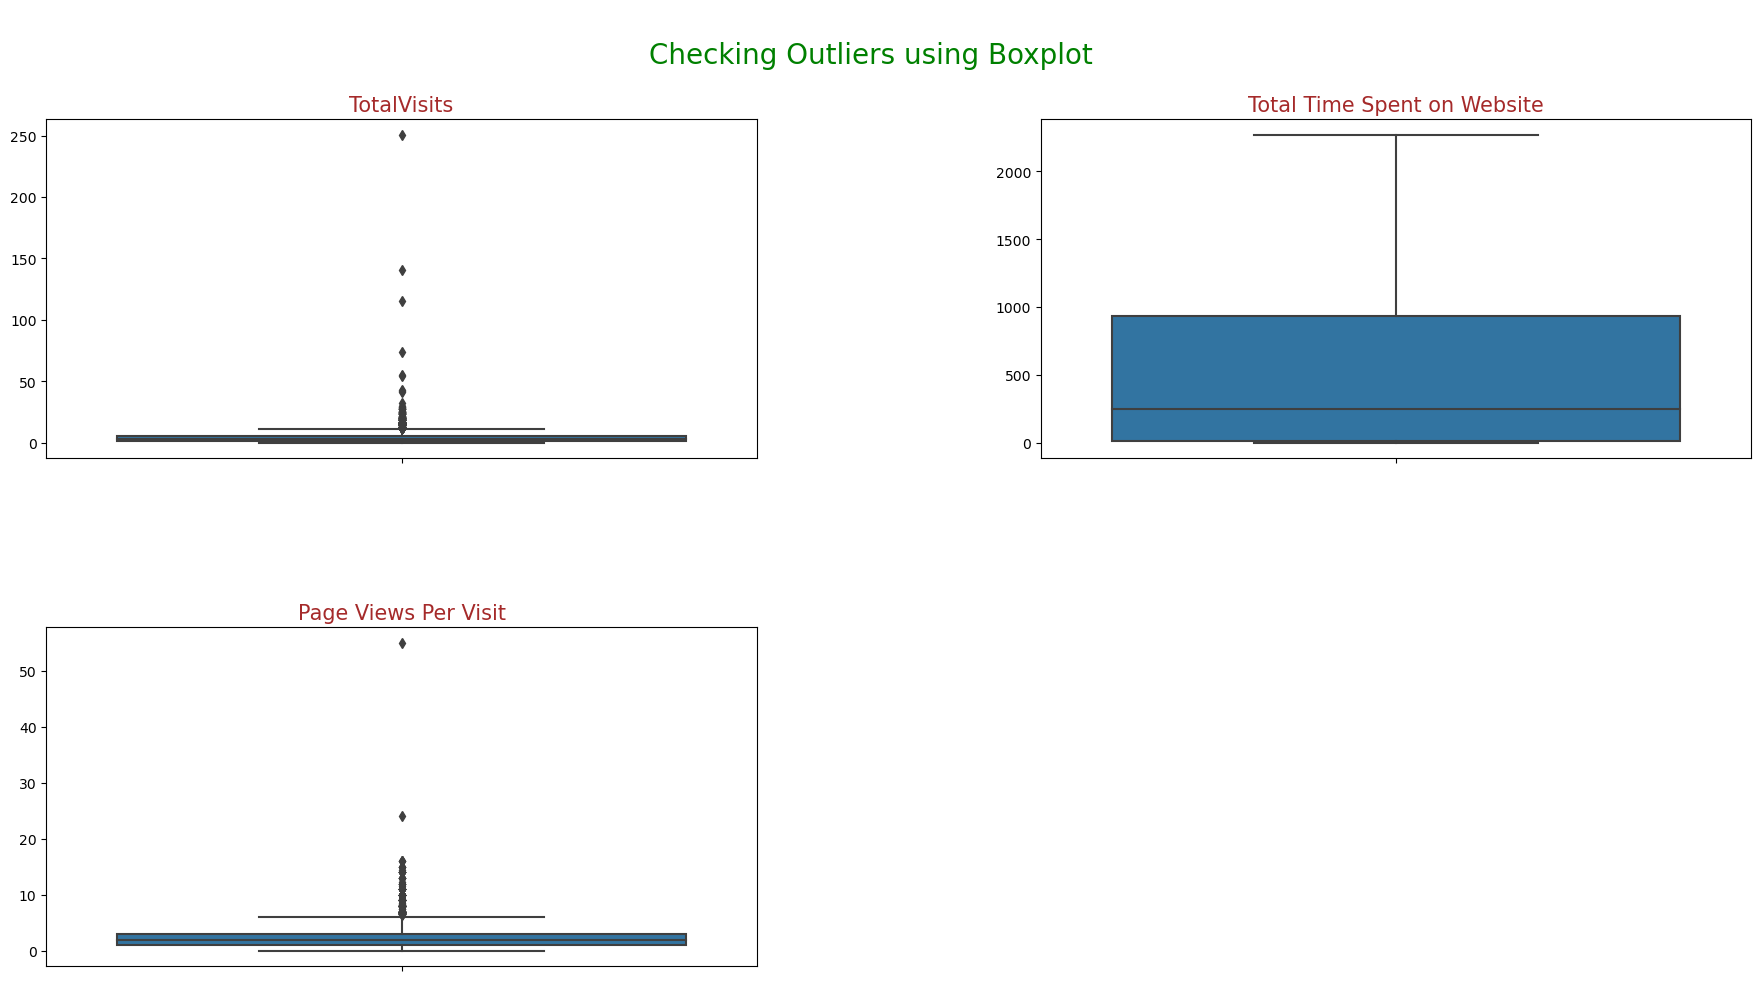

In [37]:
Check_Outliers(df,cont_cols)

In [38]:
#total visists and page views per visit has the outliers, hence capping the outliers

In [39]:
df.describe(percentiles=[.10,.25,.50,.75,.95])


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [40]:
def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        #  upper_bound cap
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        #  lower_bound cap
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [41]:

capping_columns = ["TotalVisits","Page Views Per Visit"]


Outlier_treatment(df,capping_columns)

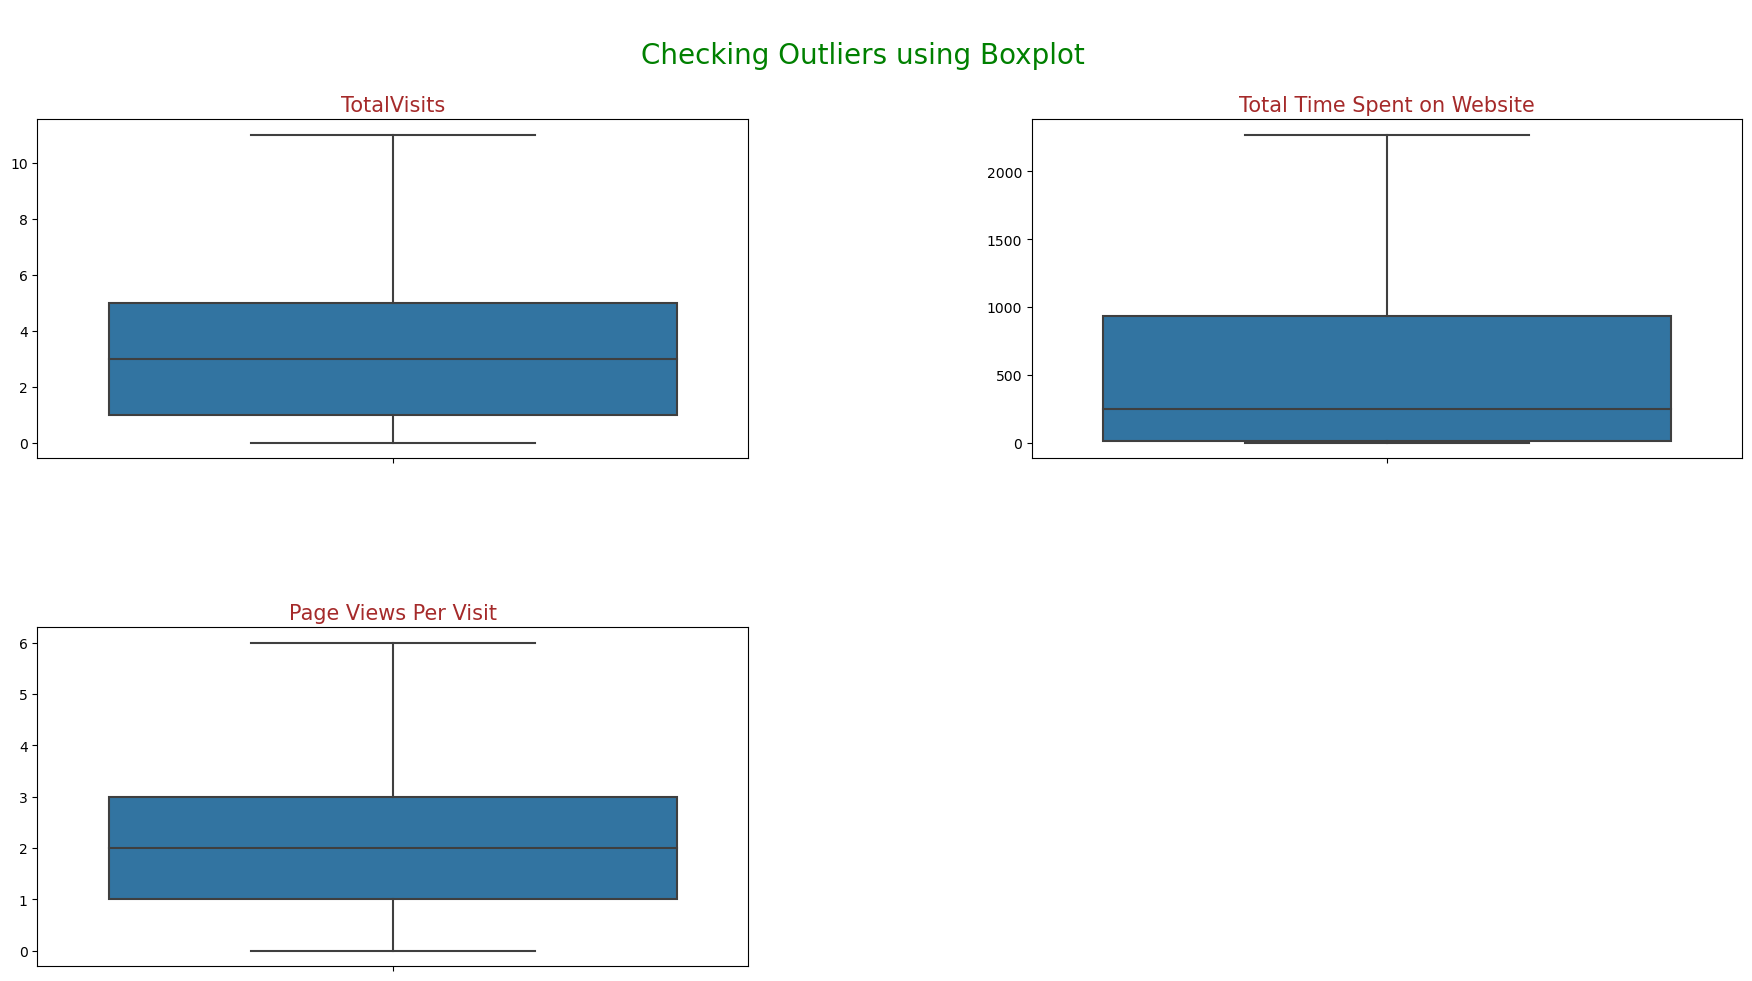

In [42]:
Check_Outliers(df,cont_cols)

In [43]:
##Grouping low frequency values ot others

In [44]:
df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [45]:
df['Country']= df['Country'].map(lambda x: x if x in ['India', 'United States', np.nan] else 'Other Countries')


In [46]:
df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [47]:
df['Lead Source'] = df['Lead Source'].replace("google","Google")


In [48]:
df['Lead Source'] = df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")


In [49]:
df['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [50]:
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

###  Step 4 :EDA

In [52]:
cat_cols = df.select_dtypes(include=['category','object']).columns.tolist()
cont_cols=["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

In [53]:
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview']

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [55]:
#Univariate Analysis

Converted


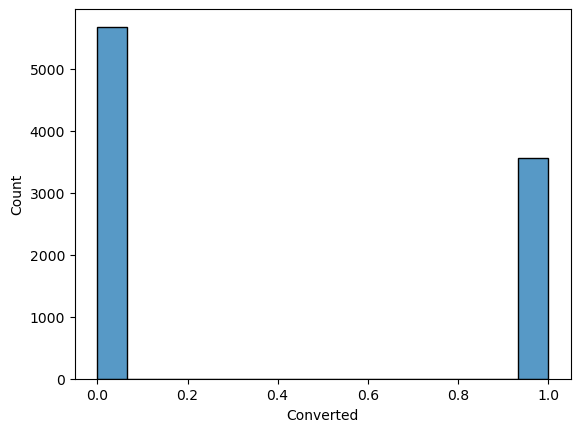

TotalVisits


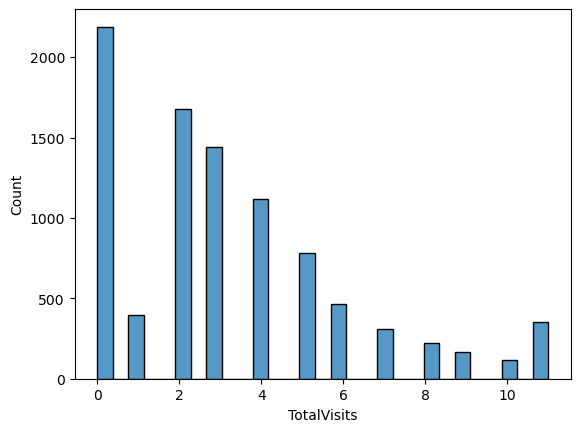

Total Time Spent on Website


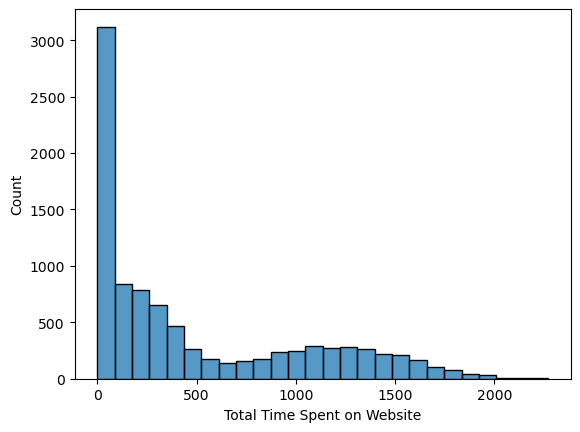

Page Views Per Visit


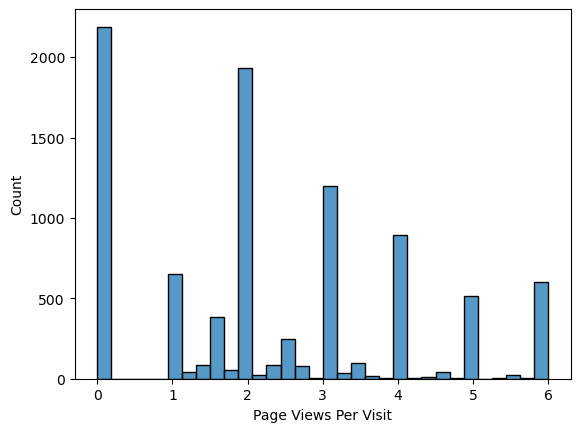

In [56]:
for i in cont_cols:
    print(i)
    sns.histplot(x=df[i])
    plt.show()

Lead Origin


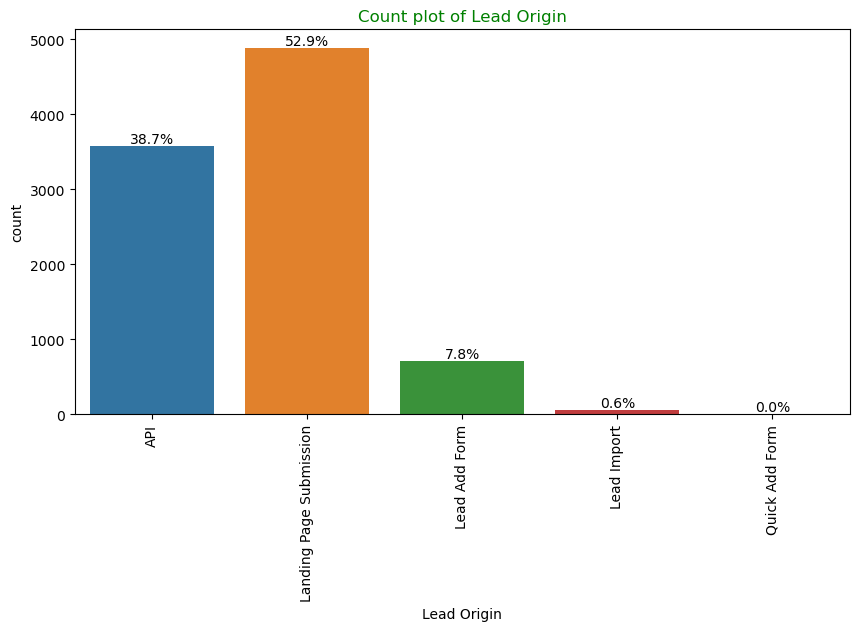

Lead Source


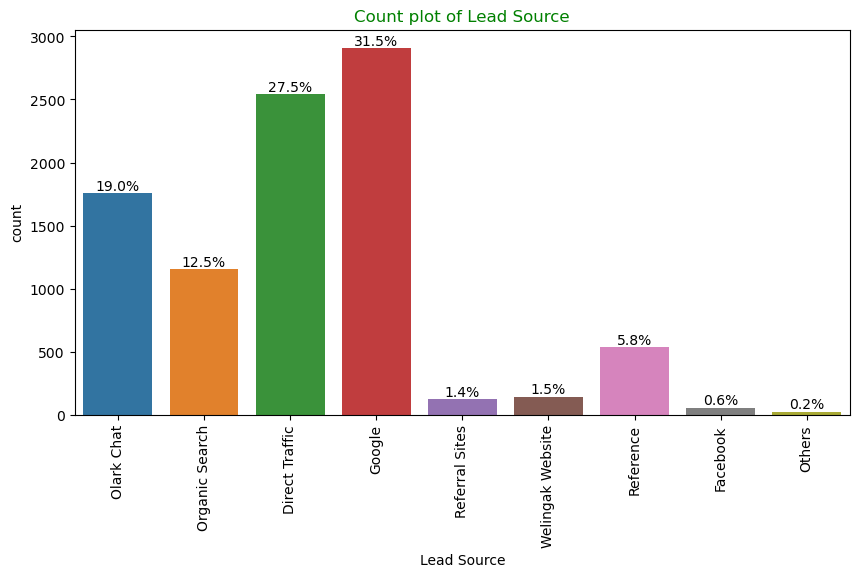

Do Not Email


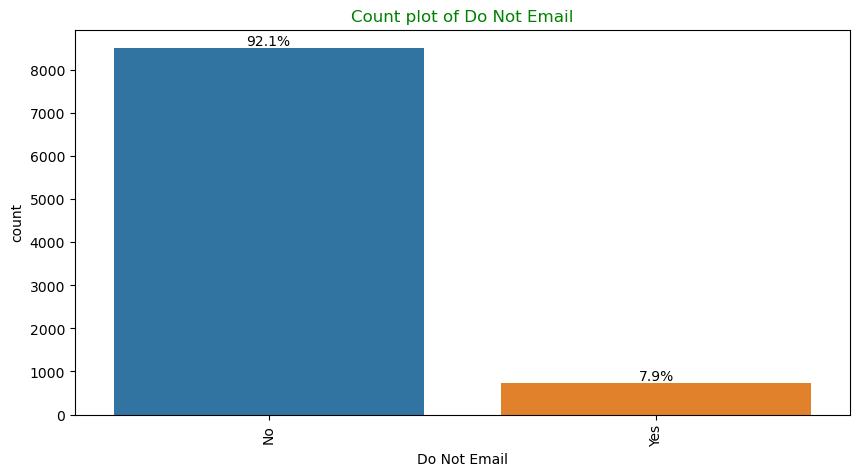

Do Not Call


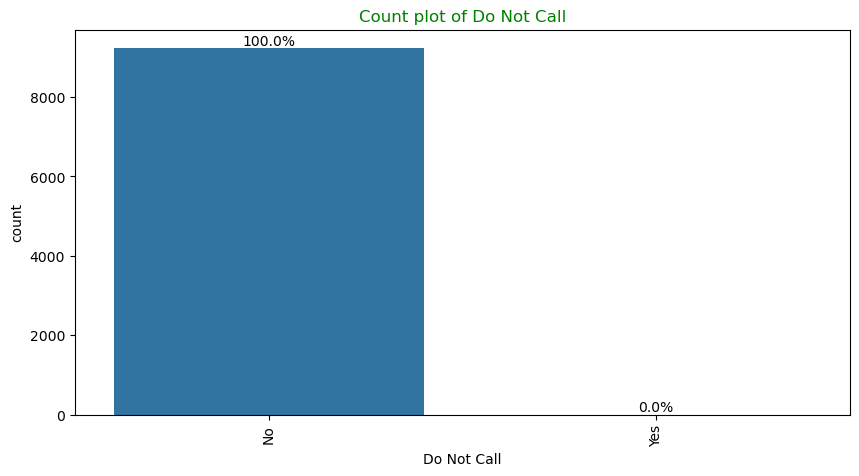

Last Activity


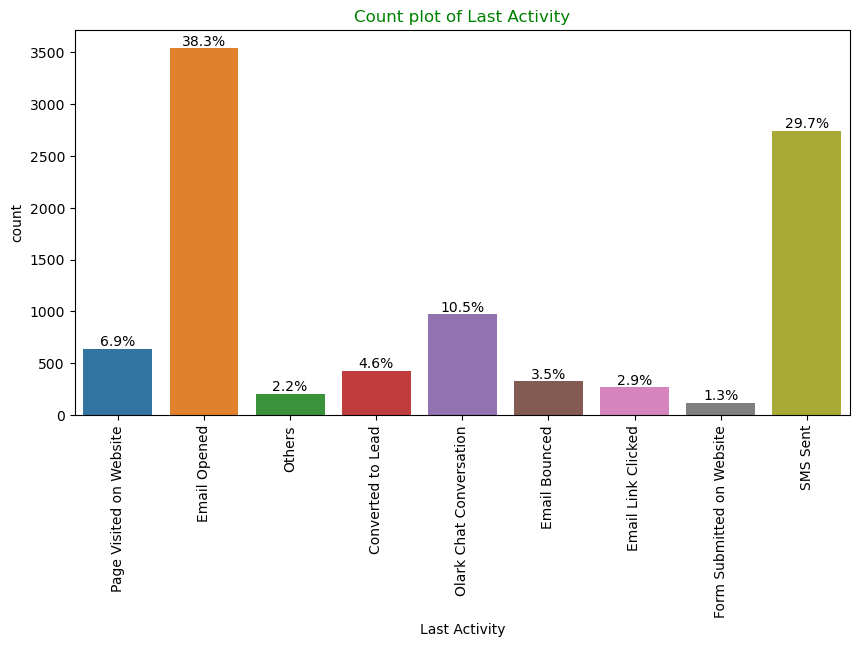

Country


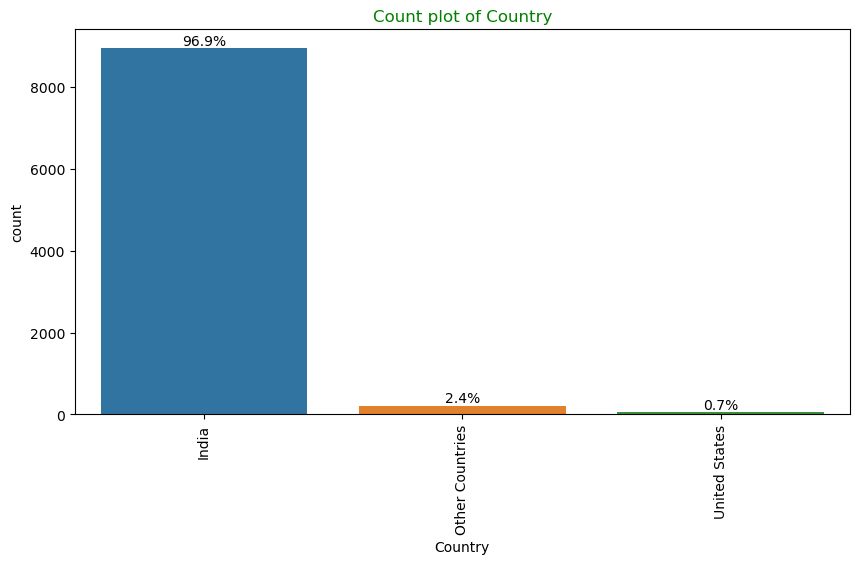

Specialization


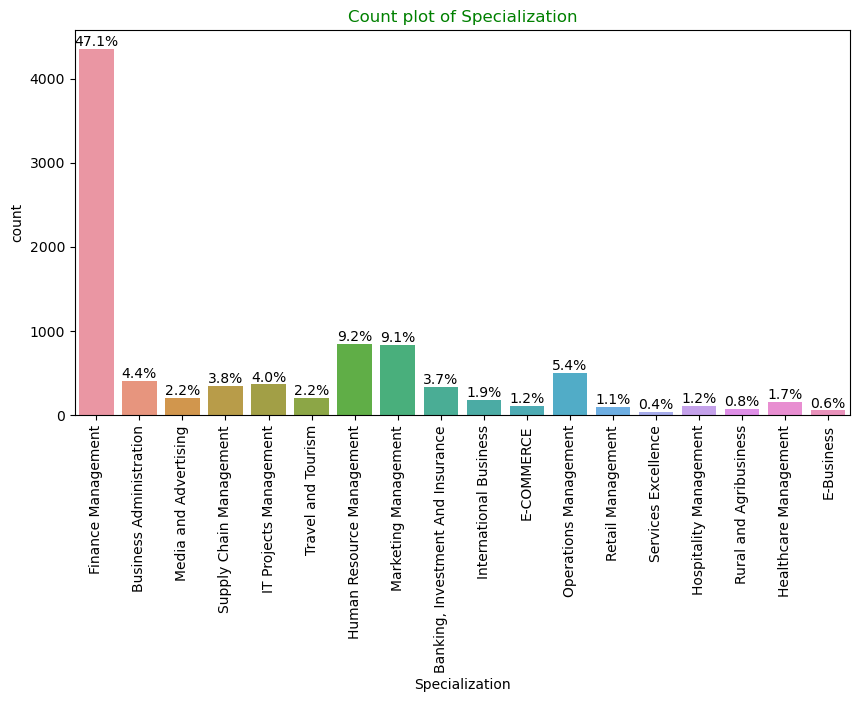

What is your current occupation


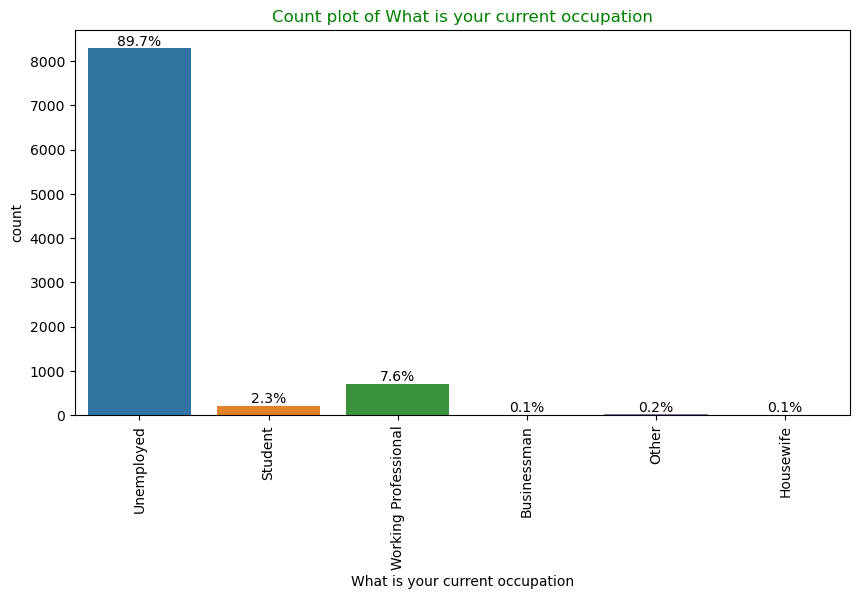

What matters most to you in choosing a course


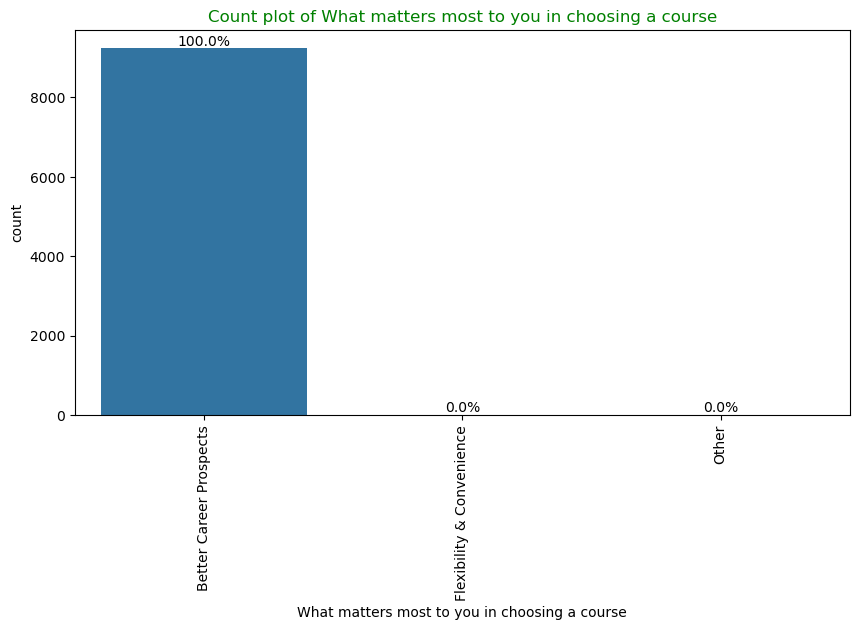

Search


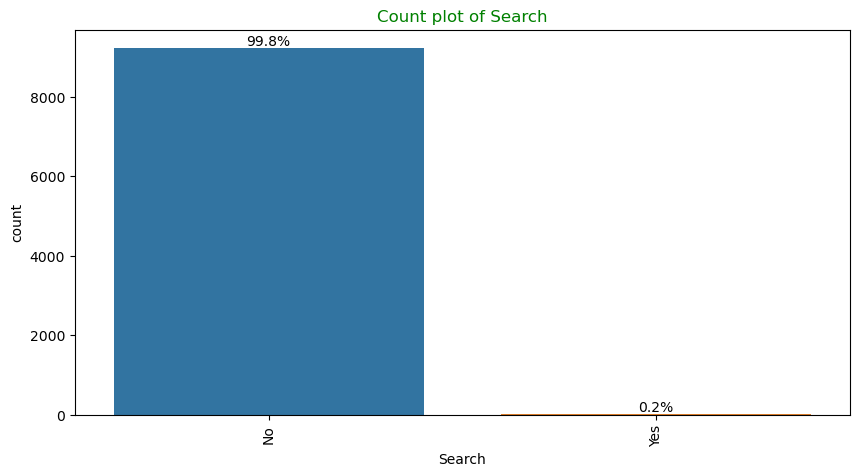

Newspaper Article


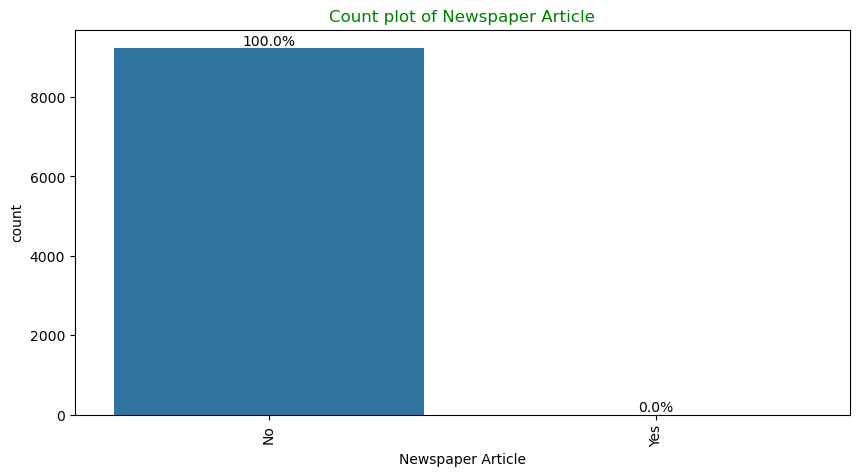

X Education Forums


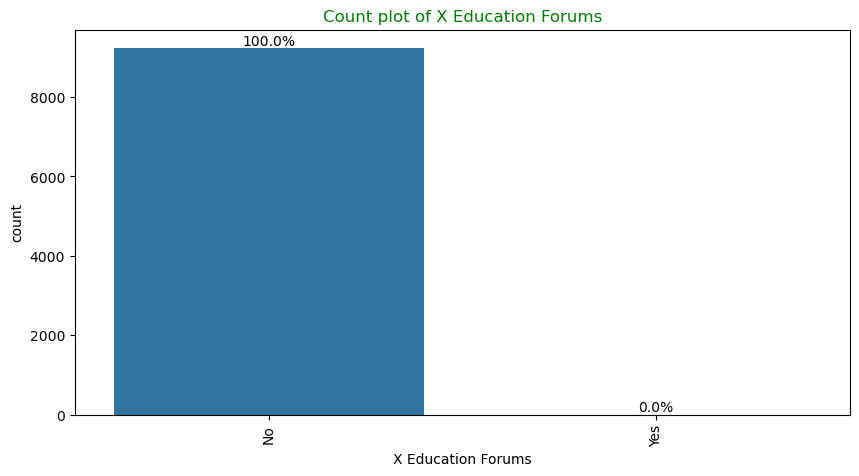

Newspaper


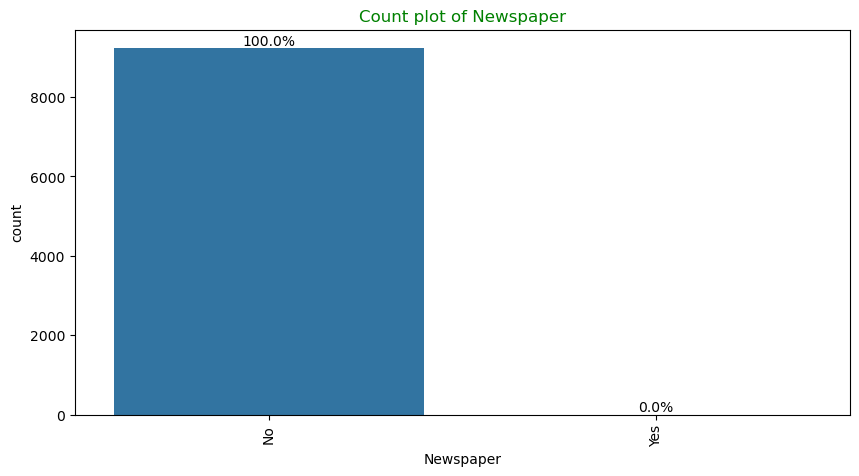

Digital Advertisement


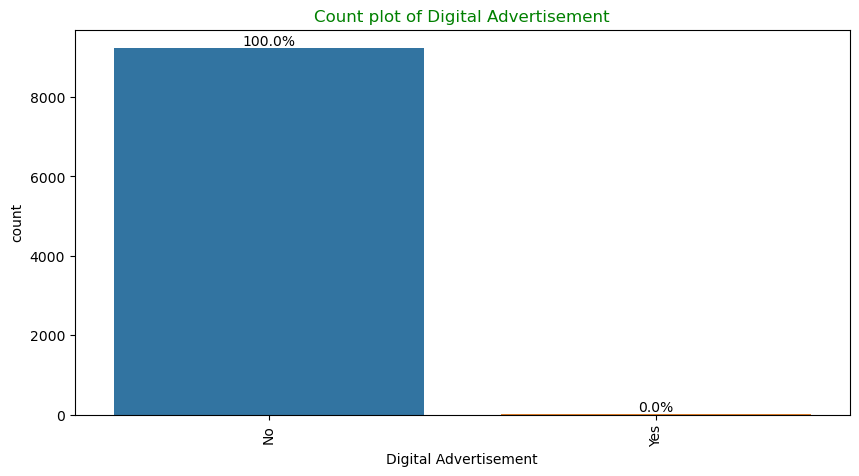

Through Recommendations


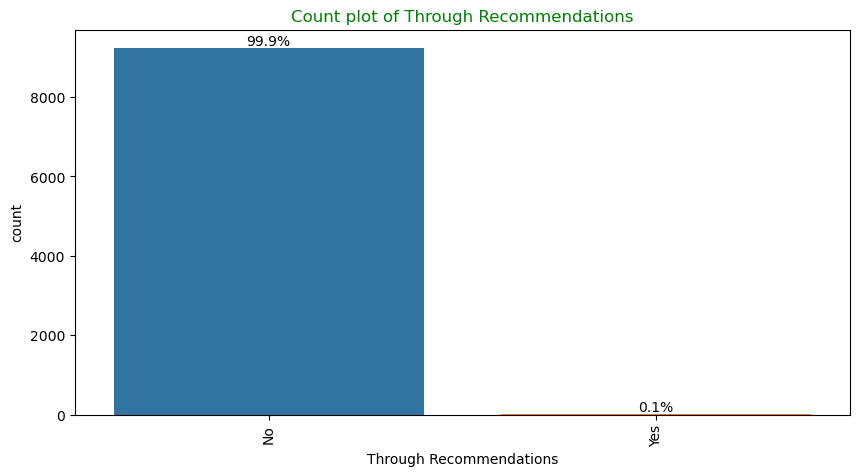

Tags


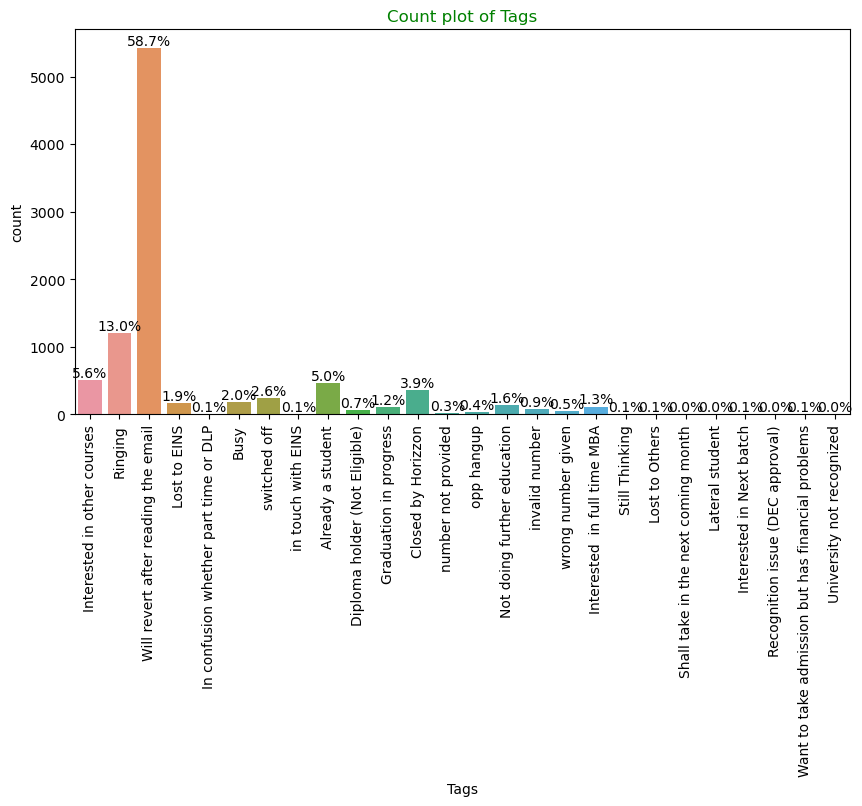

City


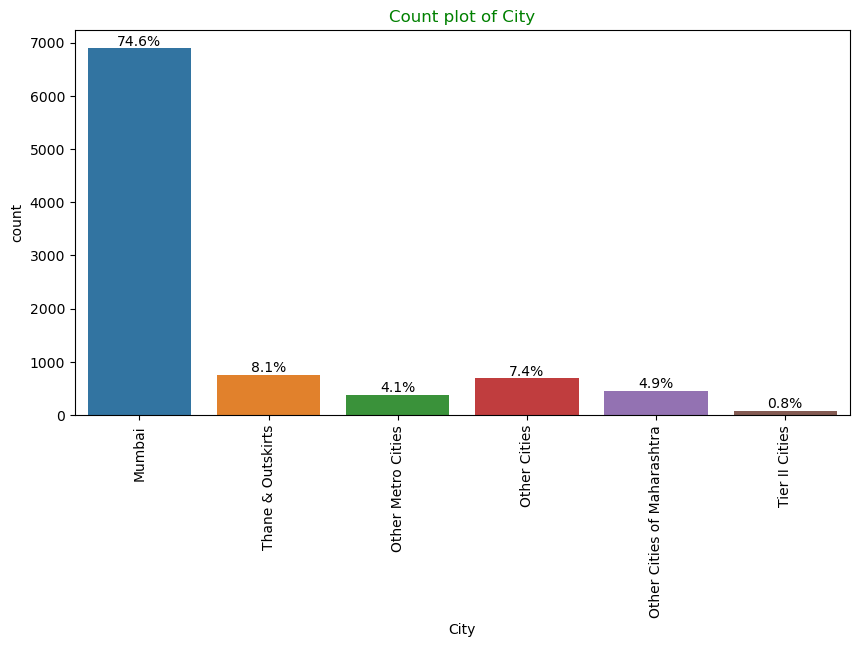

A free copy of Mastering The Interview


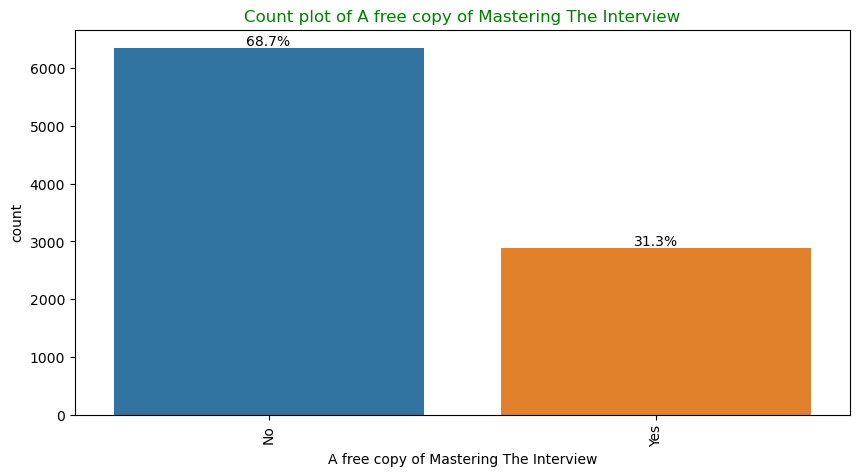

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in cat_cols[:]:
    print(i)
    plt.figure(figsize=[10, 5])
    plt.title("Count plot of {}".format(i), color="green")

    sns.countplot(x=i, data=df)
    total = len(df[i])
    
    plt.xticks(rotation=90)
    ax = plt.gca()  # Get the current Axes object

    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.show()

# Insights of Univariate Analysis 

Lead Origin: "Landing Page Submission" are 53% customers and "API" are 39%, with most releavant percentage.

Lead Source : This has highest percentage of 31.5 % in google

Current_occupation: It has 90% of the customers as Unemployed

Do Not Email: 92% of the people has opted that they dont want to be emailed about the course.

Last Activity: 38% and 30% of customers are in  Email Opened and SMS sent activities

### Bivariate analysis

<Figure size 1600x400 with 0 Axes>

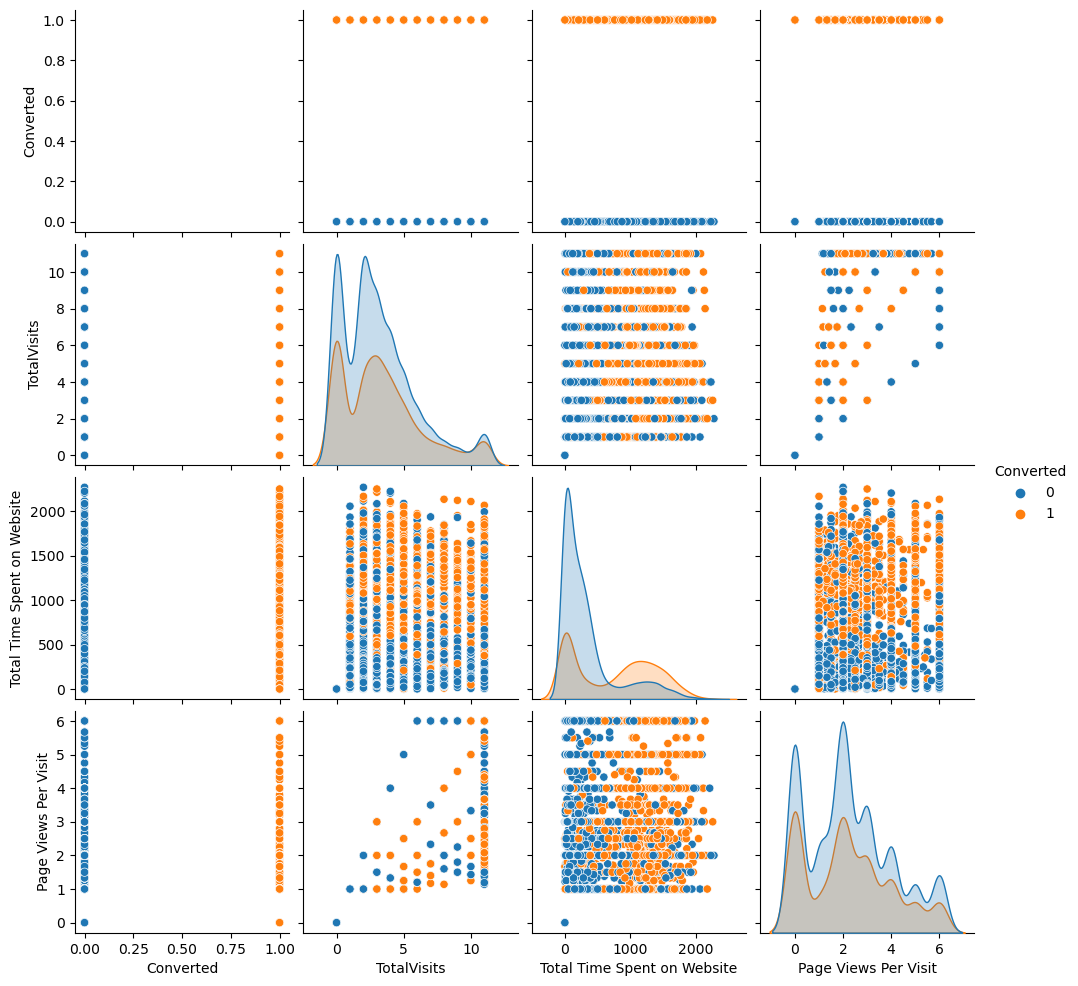

In [58]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df,vars=cont_cols,hue="Converted")                                  
plt.show()

In [59]:
def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="prism_r",alpha=0.46)
    
    total=len(df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

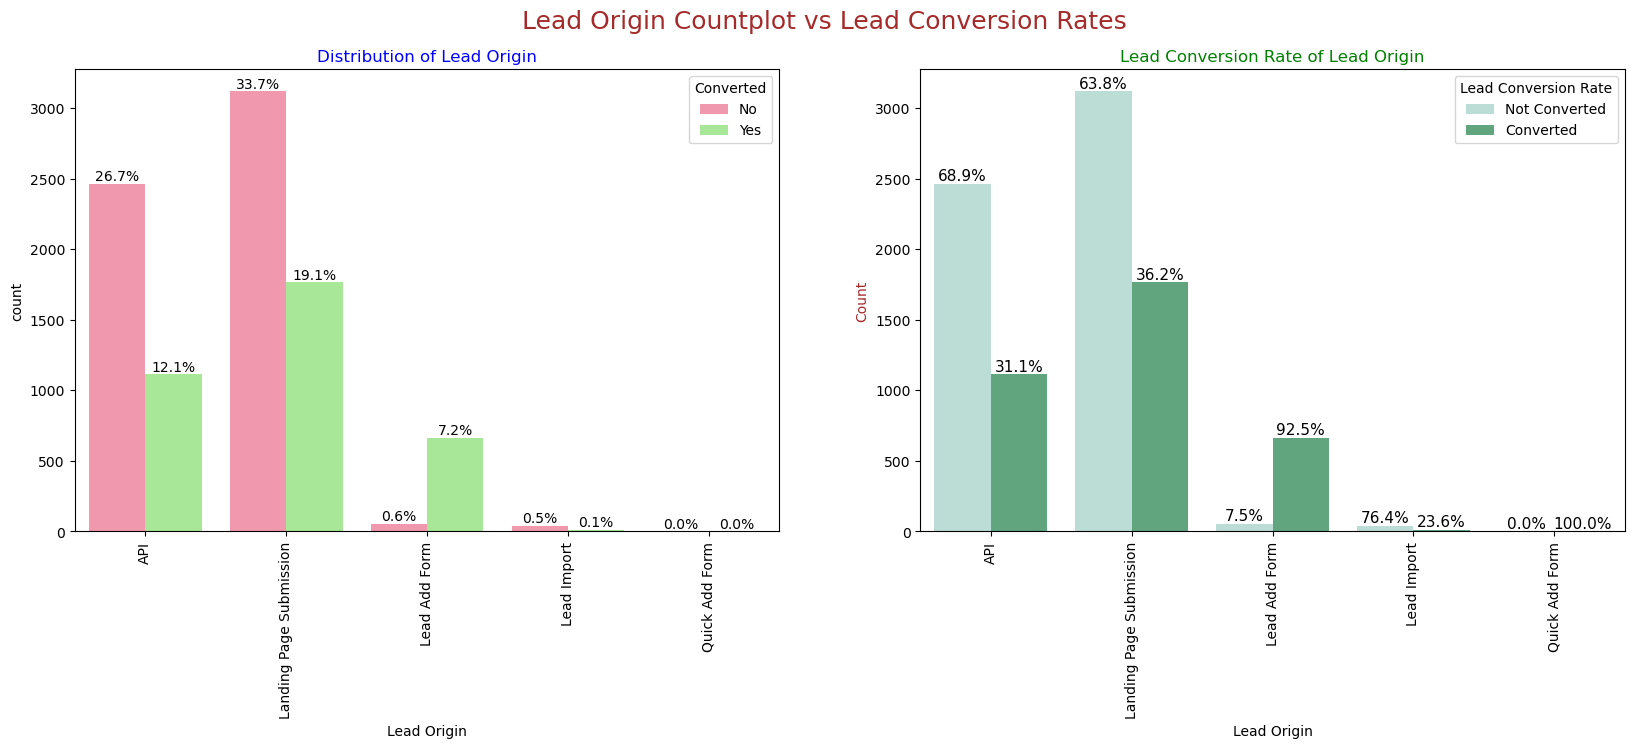

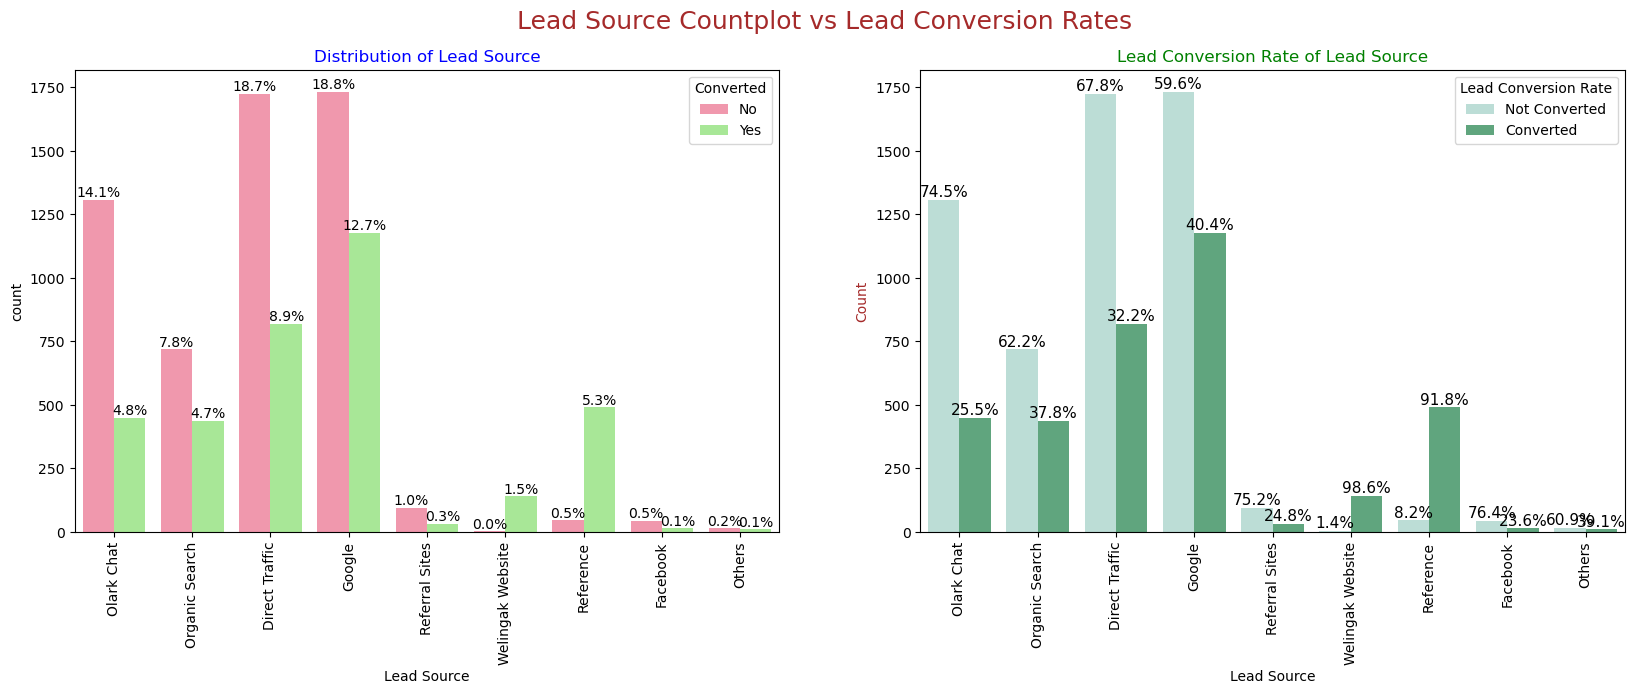

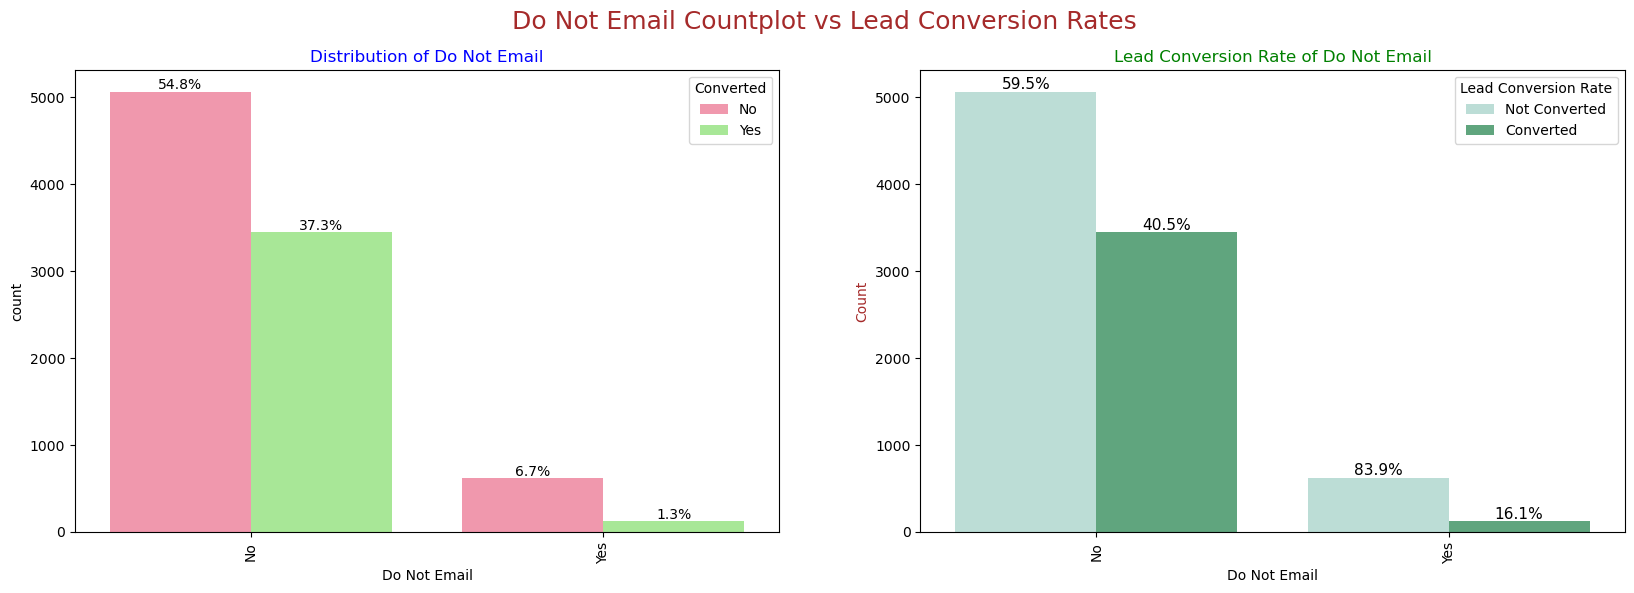

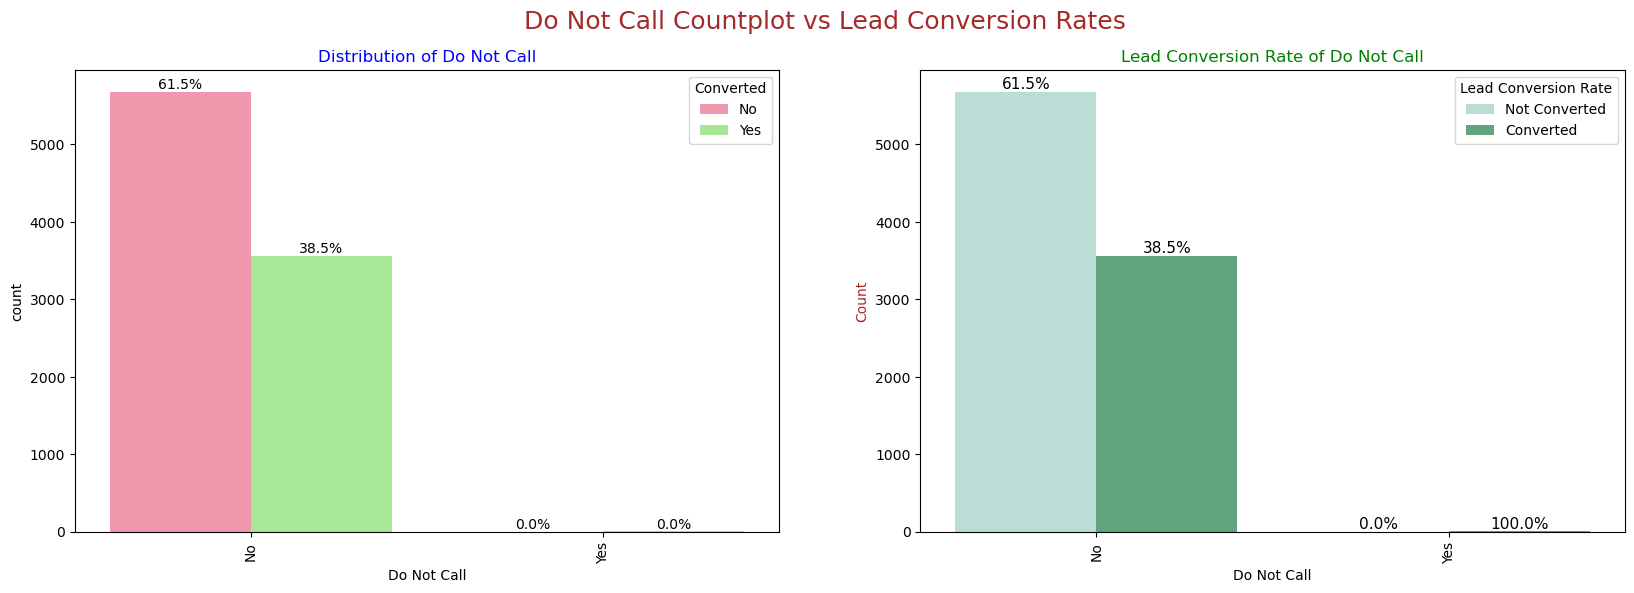

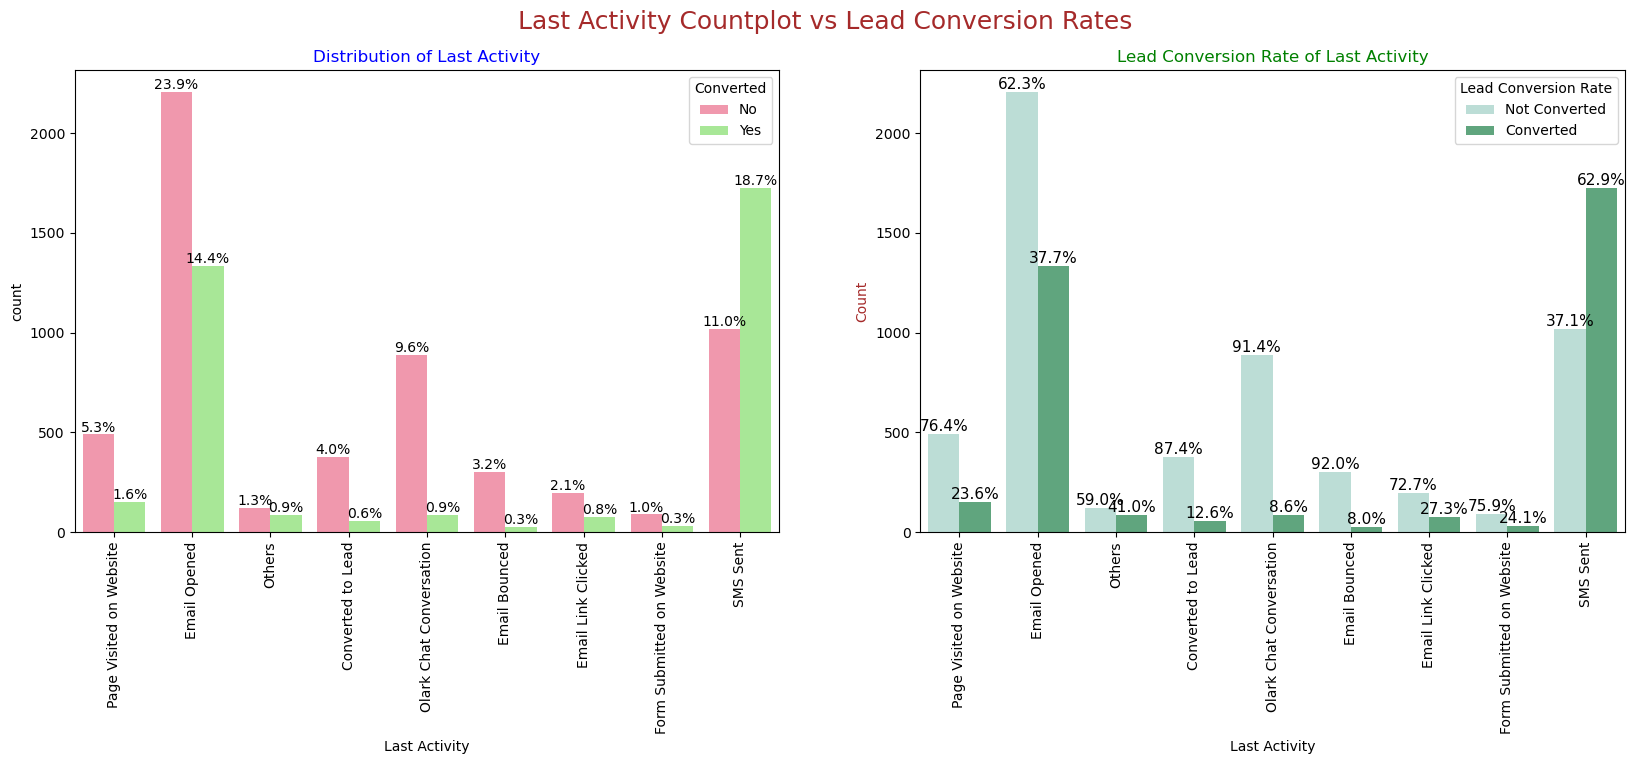

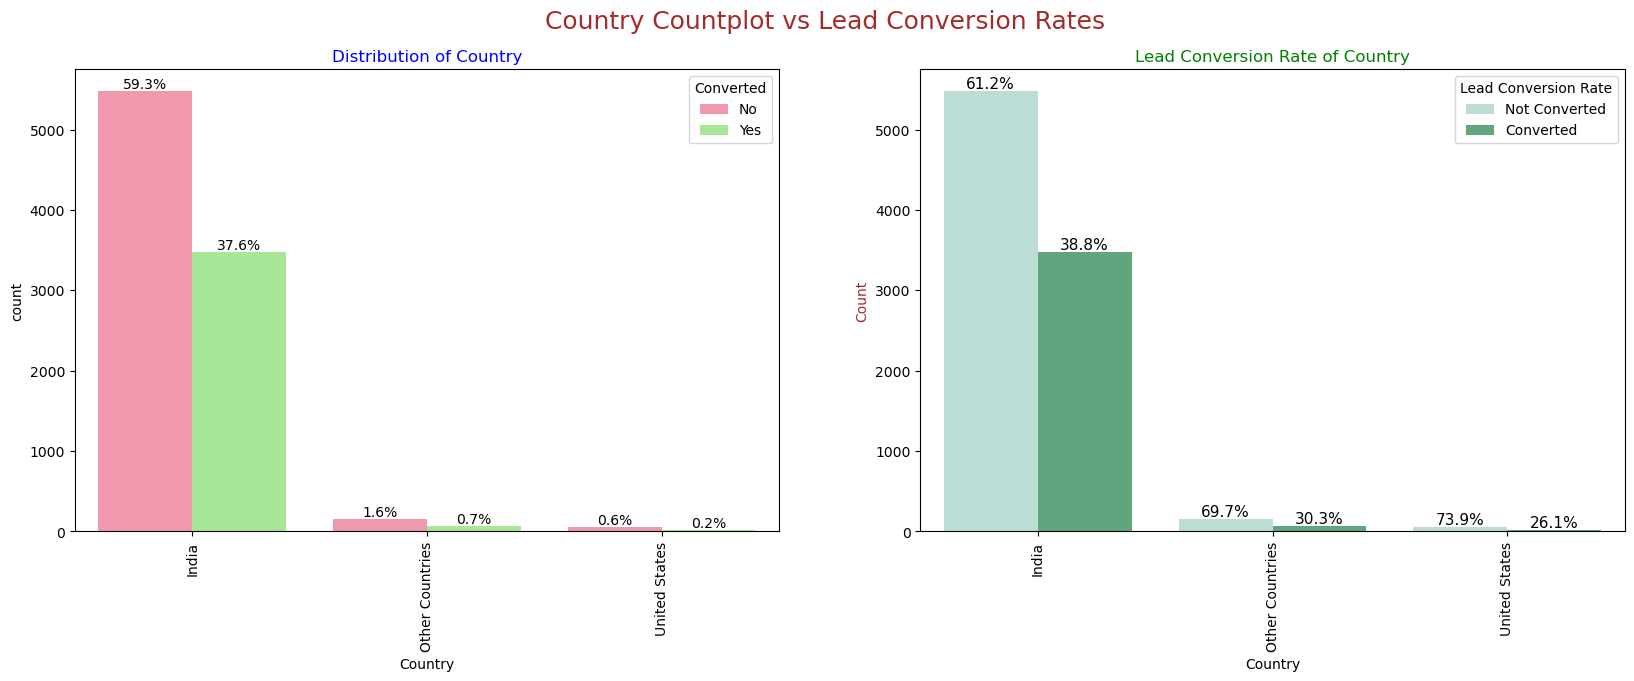

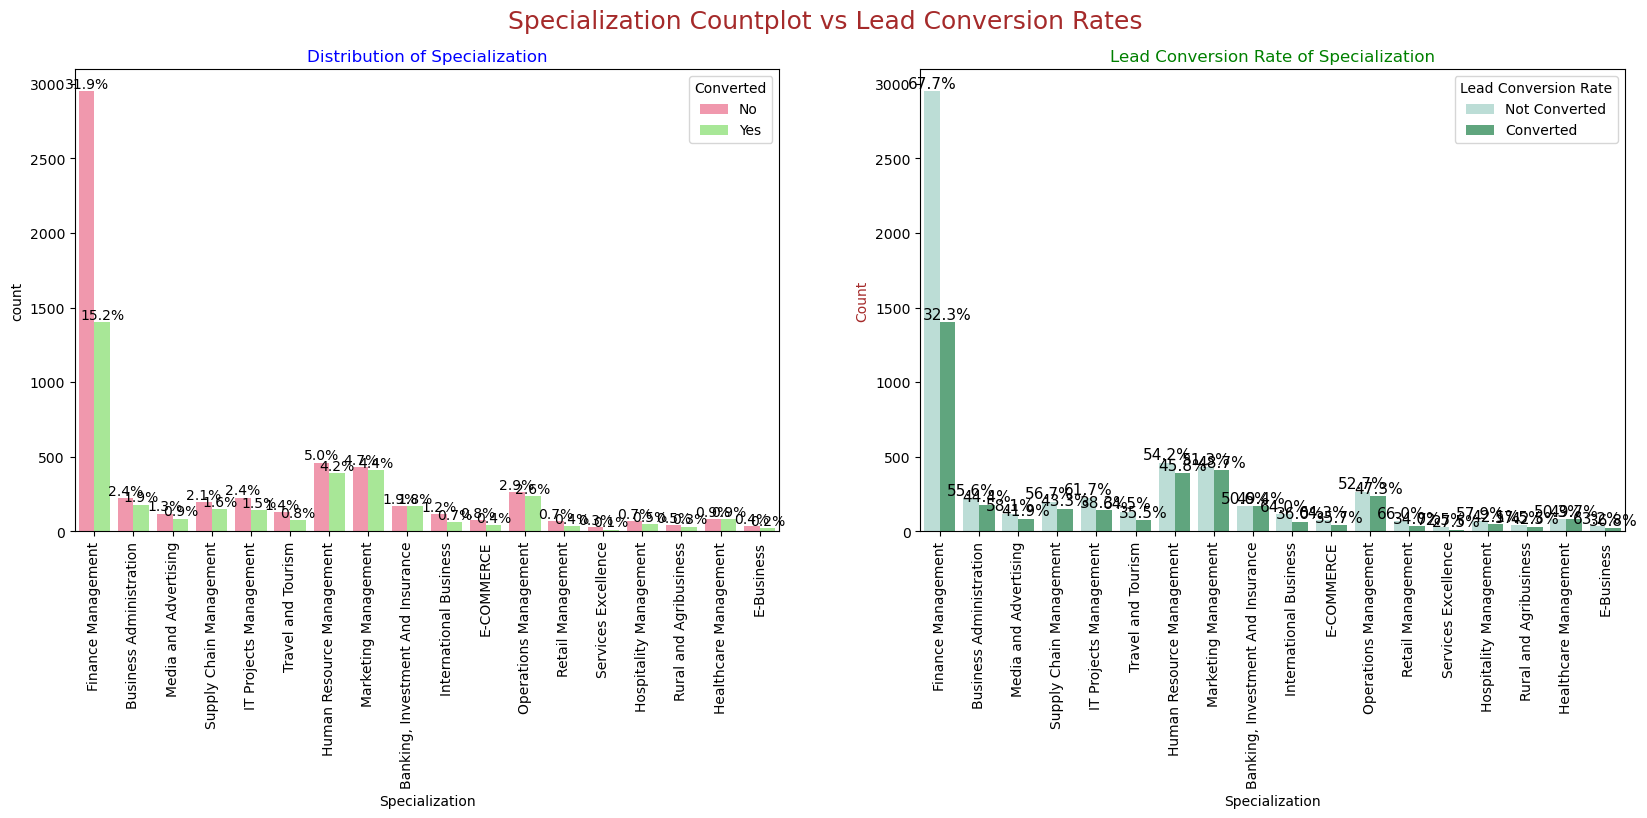

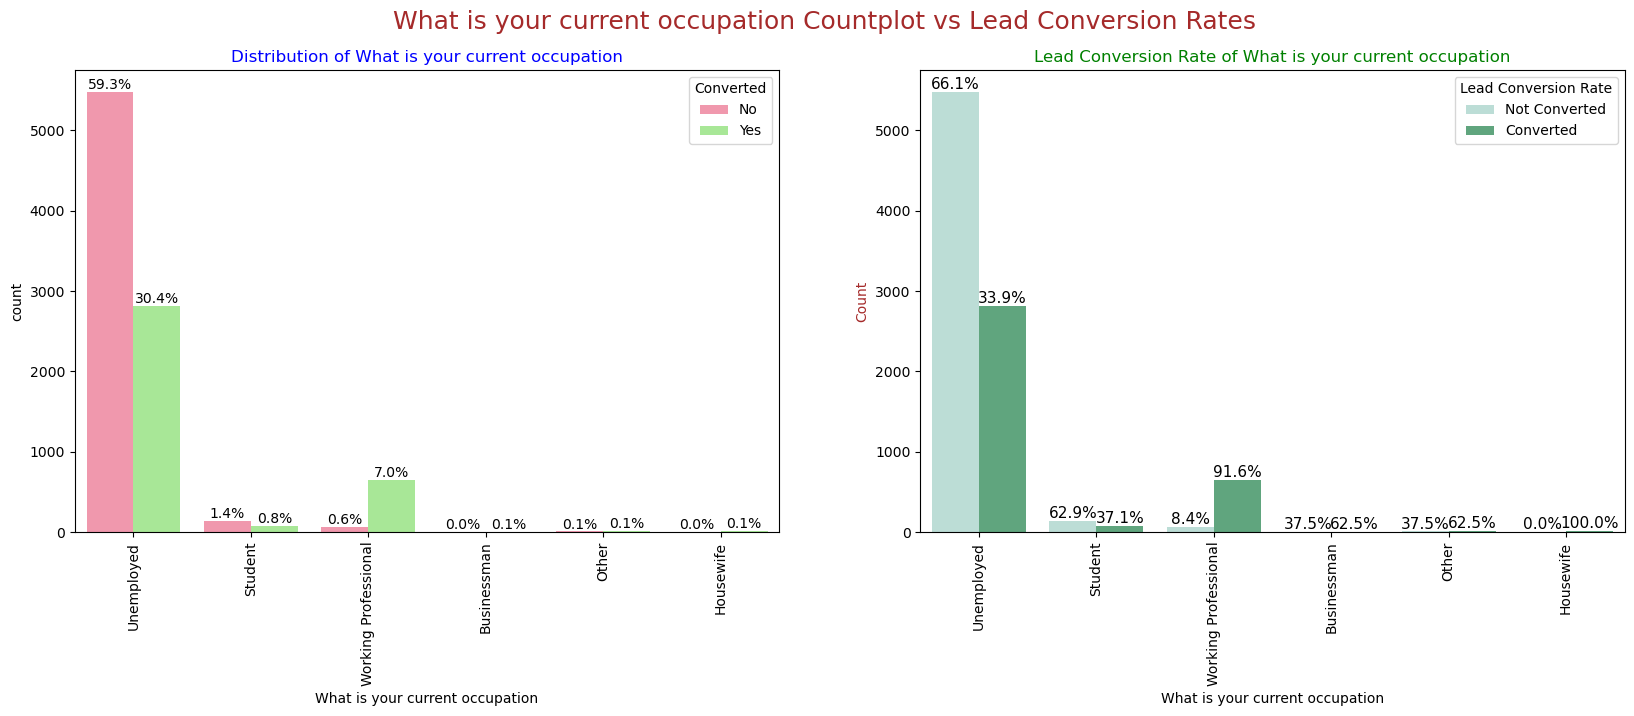

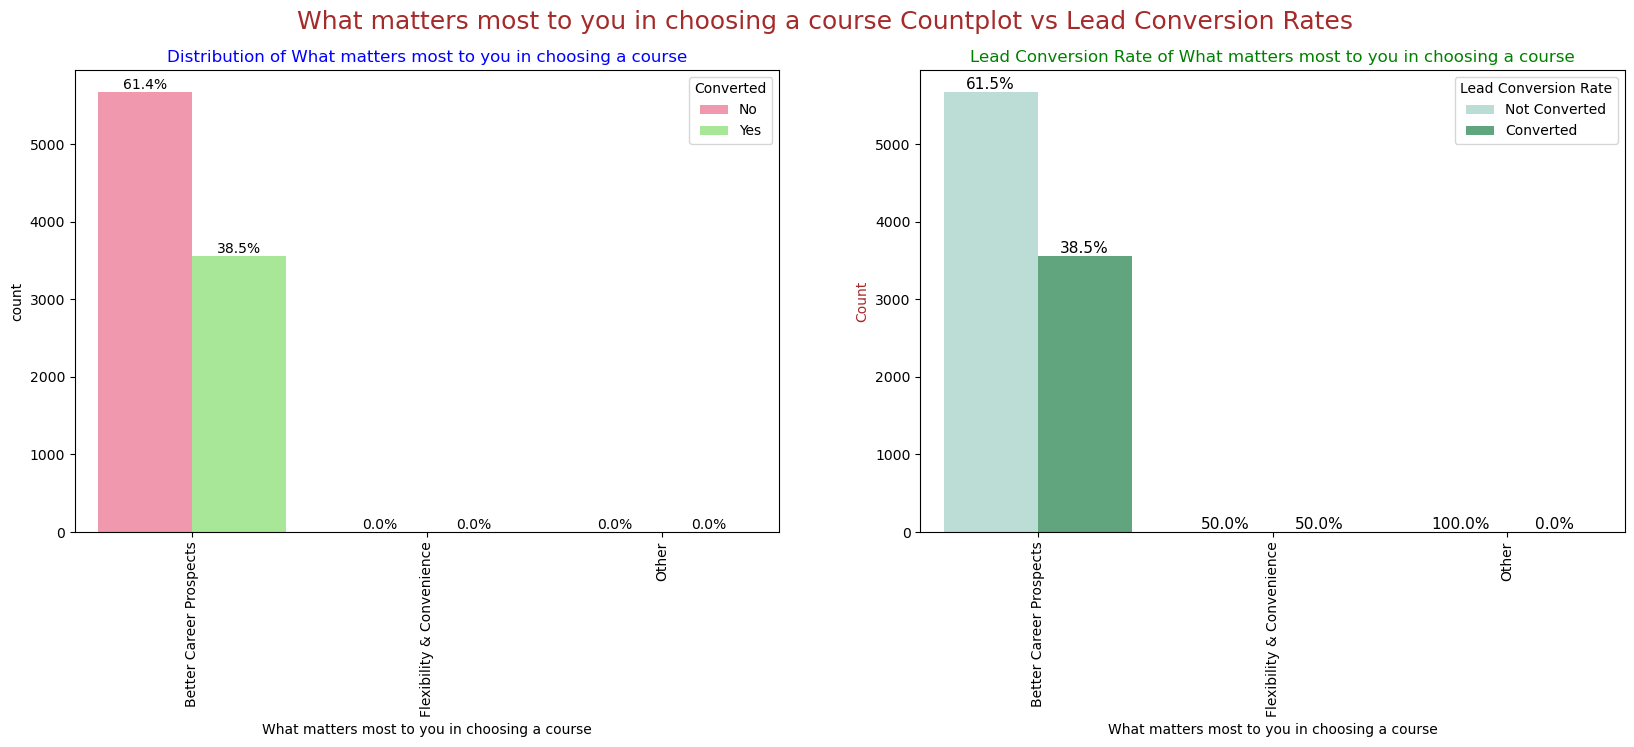

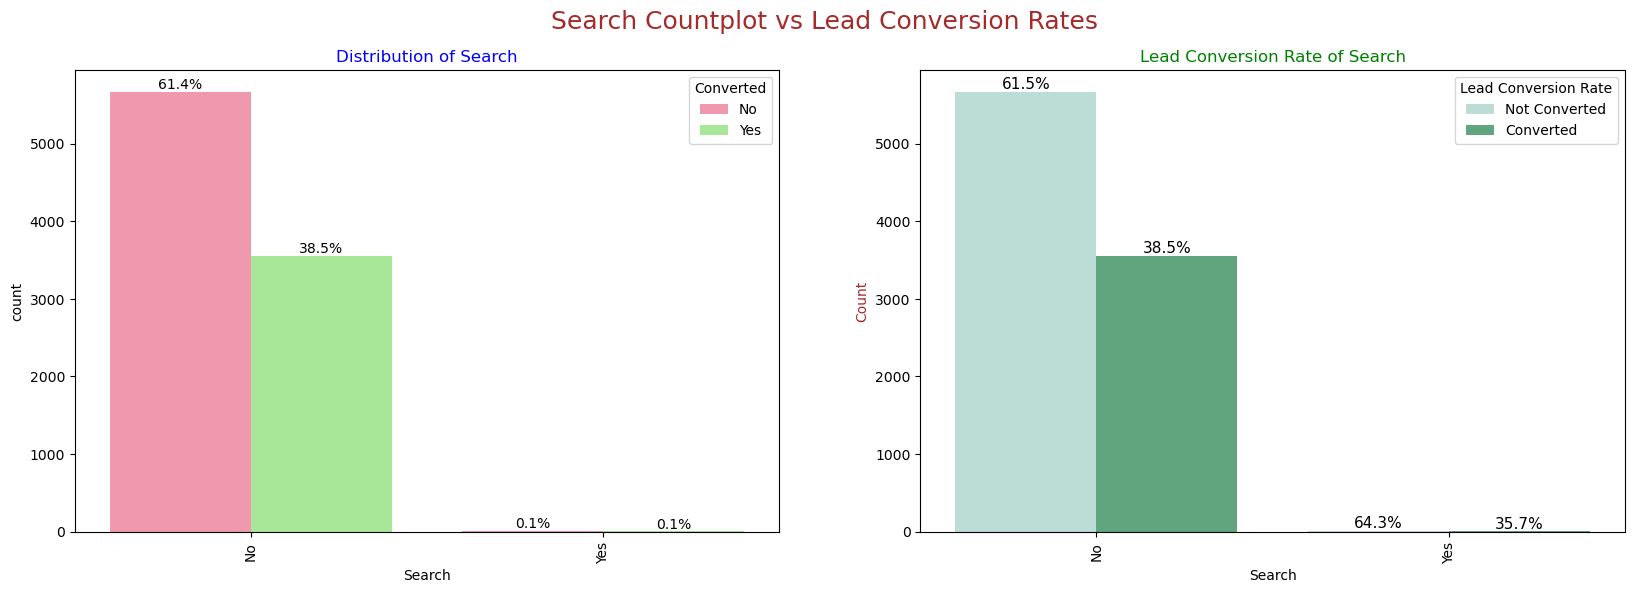

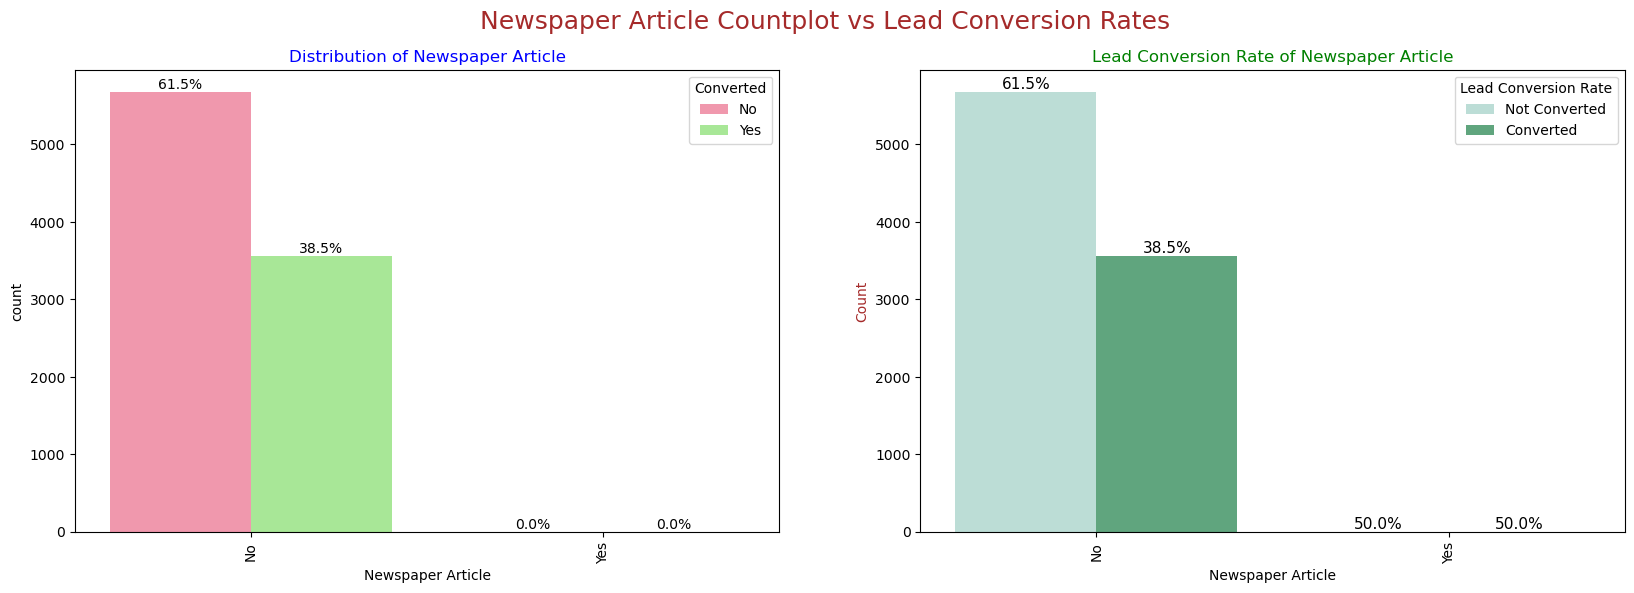

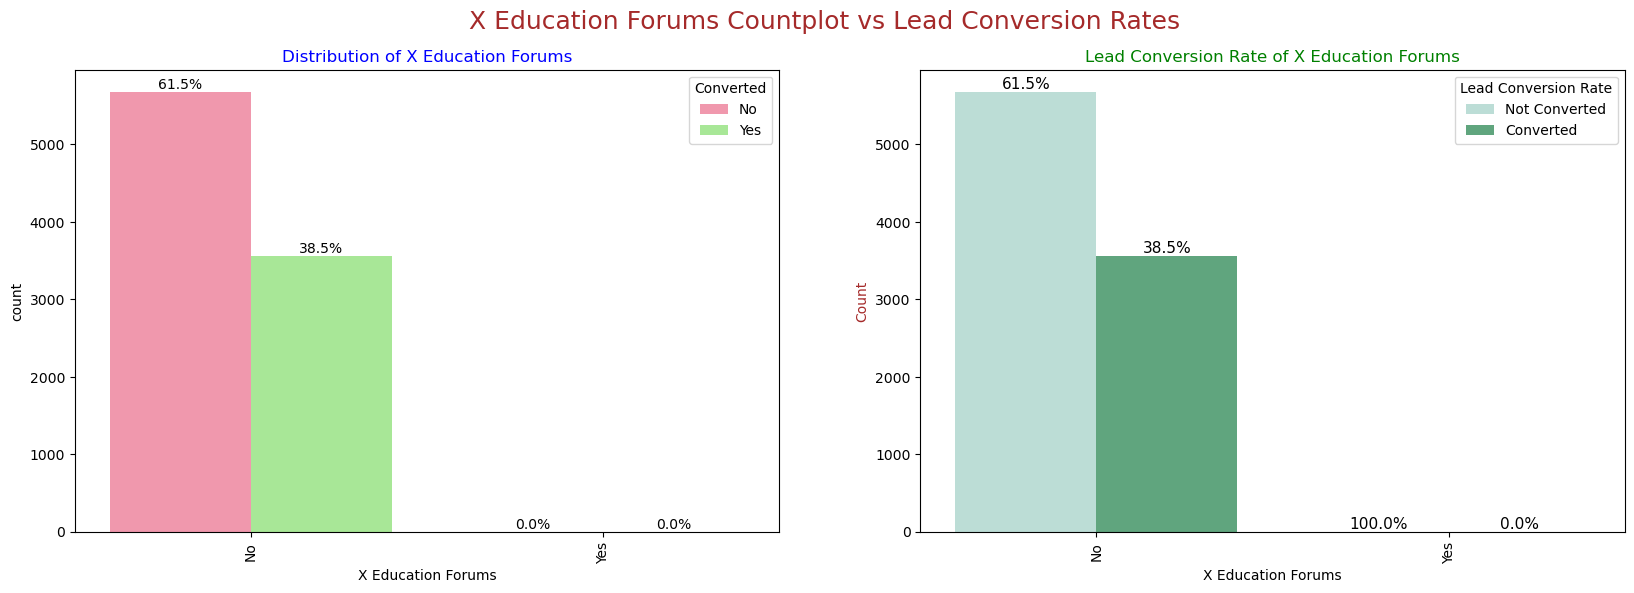

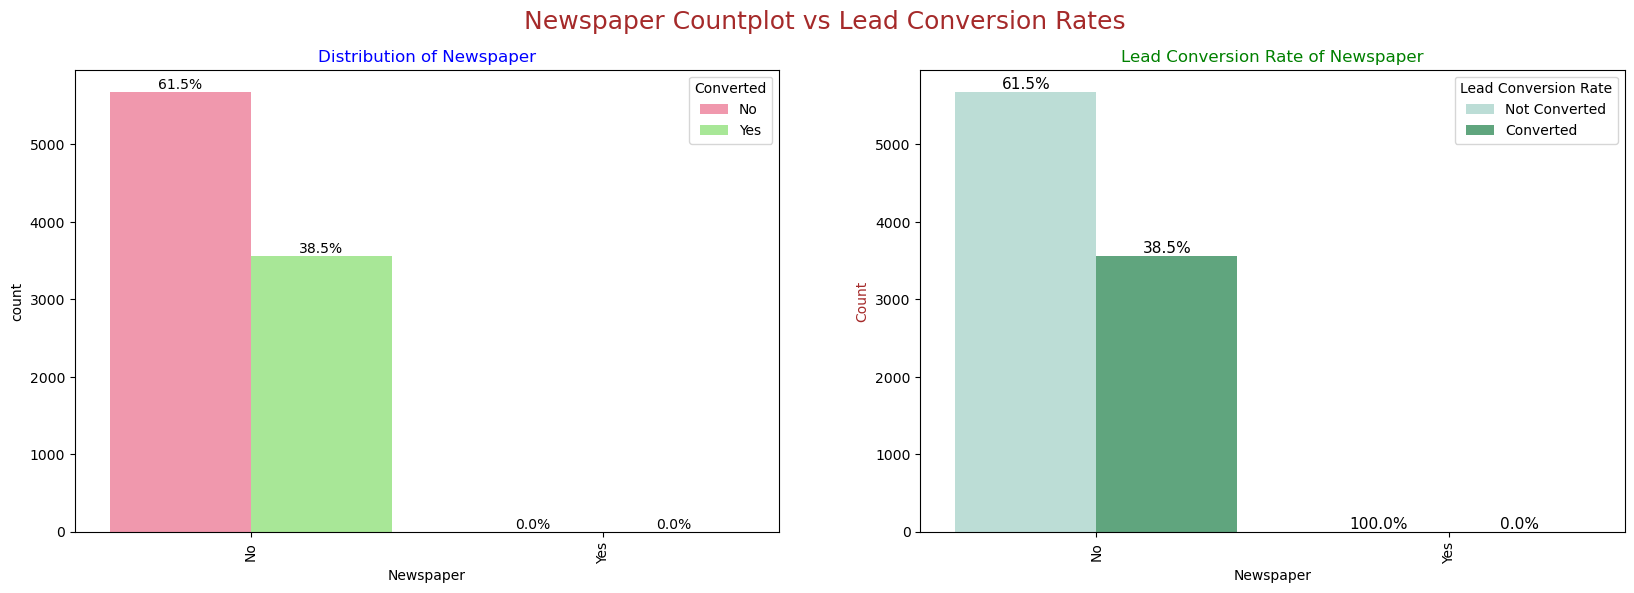

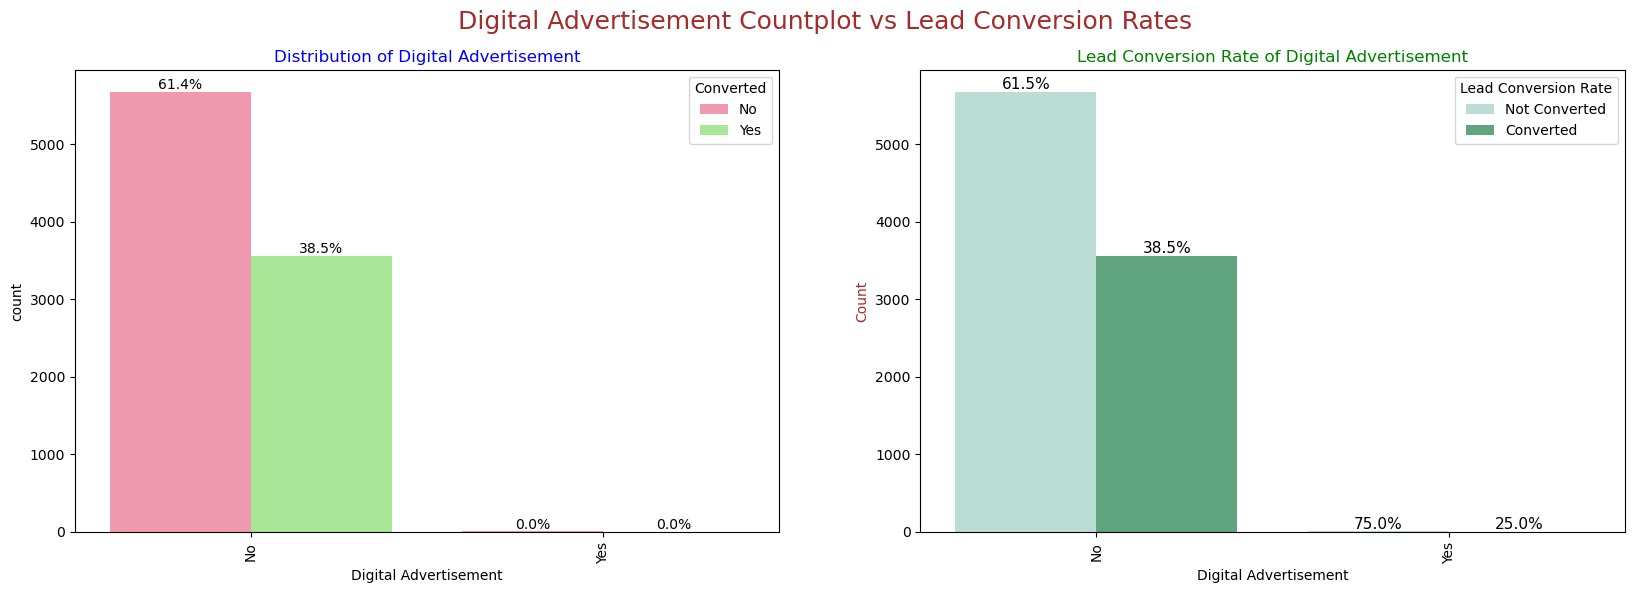

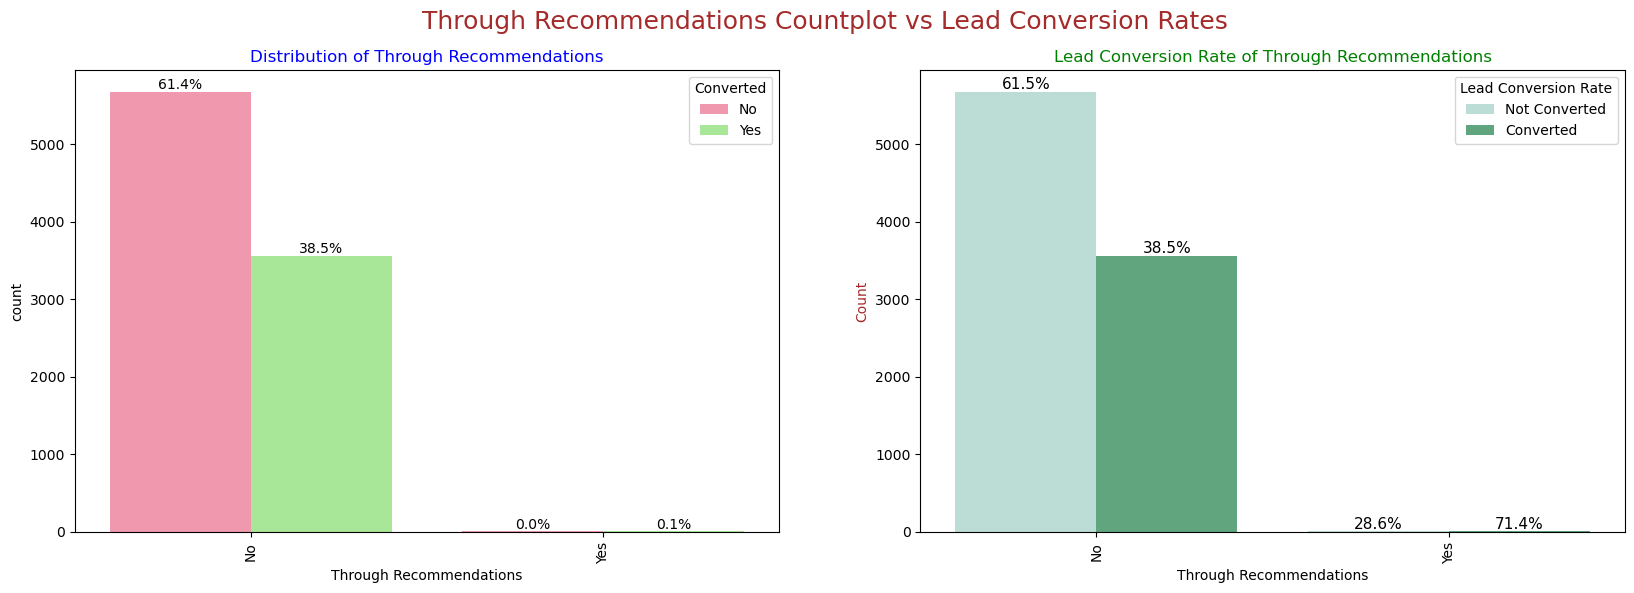

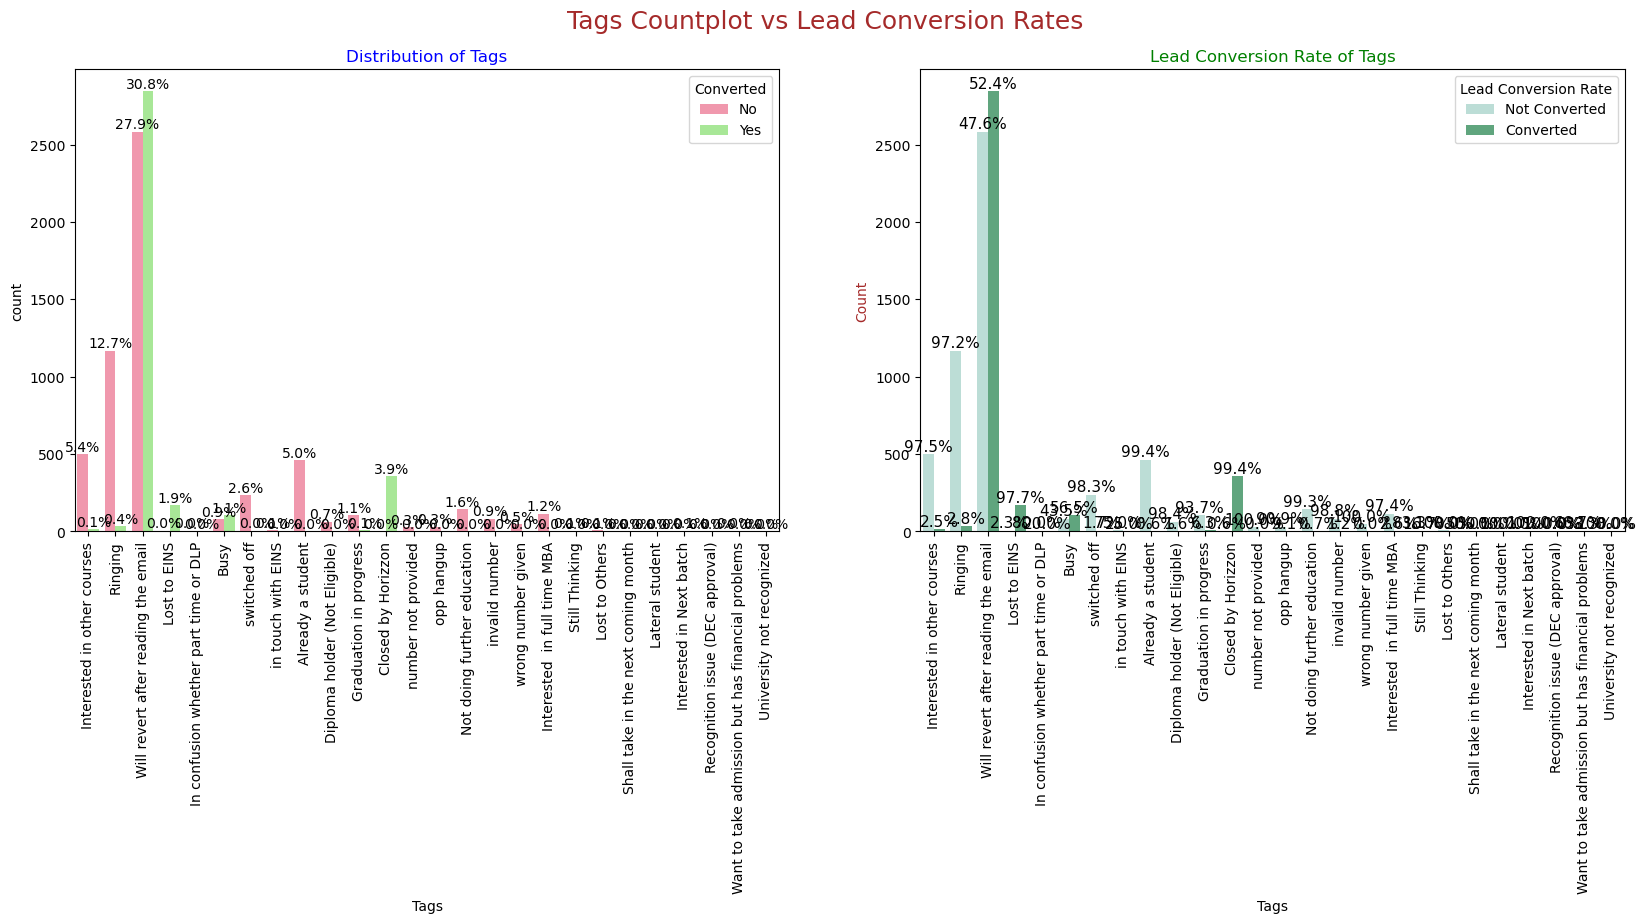

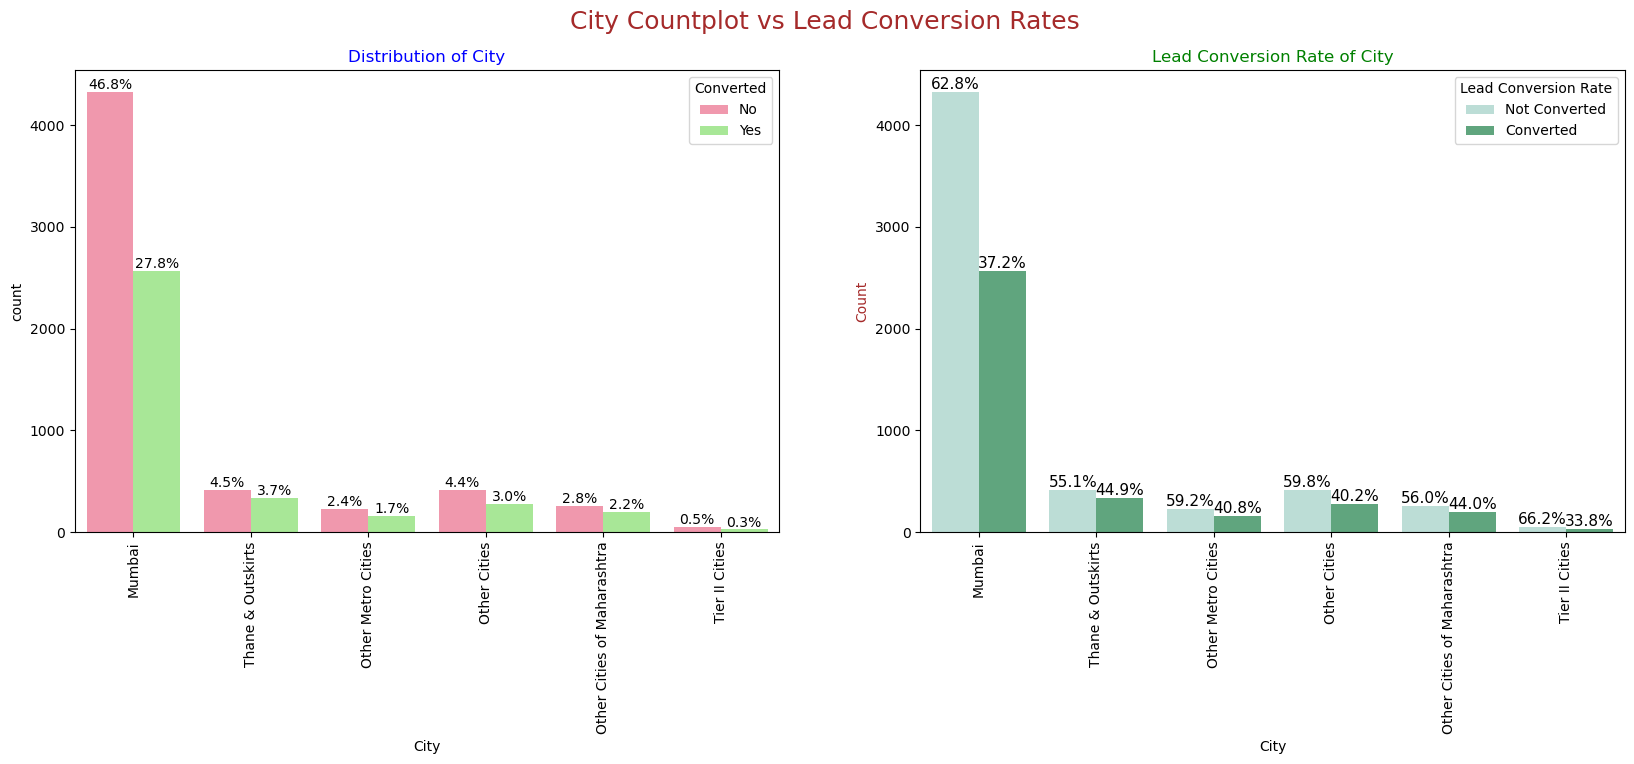

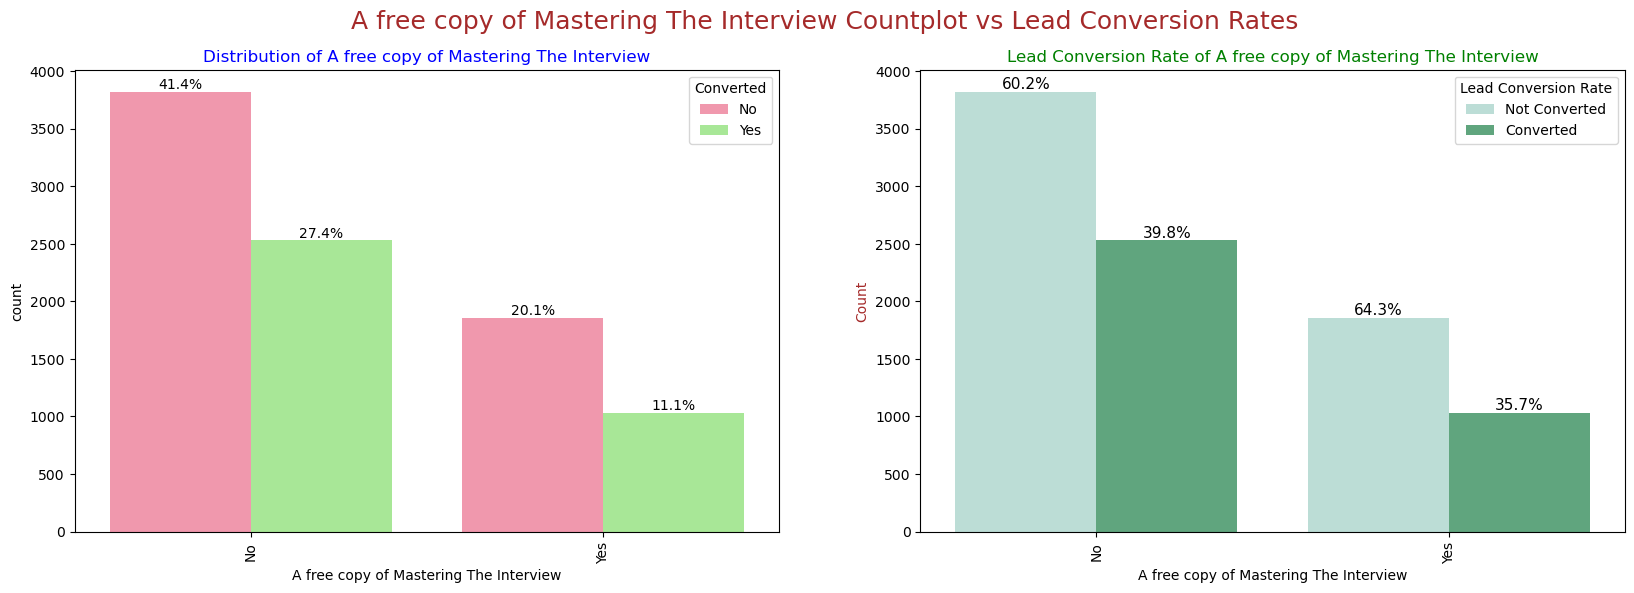

In [60]:
for i in cat_cols:
    Bivariate_cat(df,variable_name=i)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

### Insights:


Lead Origin: Approx 53% of leads originated from "Landing Page Submission". Lead conversion rate is 36%.

Current_occupation: Approx 90% of the customers are Unemployed with lead conversion rate of 34%. 

Lead Source: Google has conversion rate of 40% out of 31% customers which is highest

Last Activity: 'SMS Sent' has high lead conversion rate of 63% 

Specialization: Finance Management shows good conversion rate  with 32%.

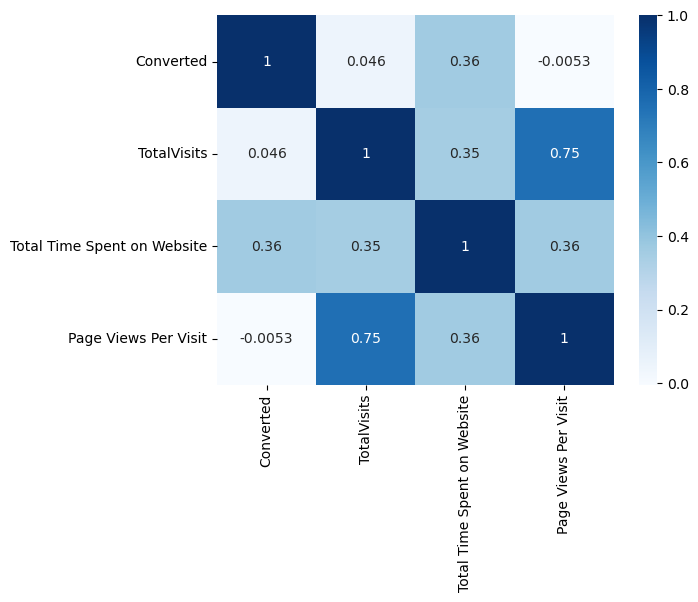

In [62]:
# Heatmap to show correlation between numerical variables

sns.heatmap(data=df[cont_cols].corr(),cmap="Blues",annot=True)
plt.show()

In [63]:
# From the above univariate plots its clearly visible that the columns 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums',
#'Newspaper','Digital Advertisement','Through Recommendations  are highly skewed and it will affect the performace of the model.
# Hence this columns will be dropped for further analysis

In [64]:
df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)


In [65]:
# Mapping Binary categorical variables Yes/No to 1/0

In [66]:
# Mapping binary categorical variables (Yes/No to 1/0) 
binary=['Do Not Email','A free copy of Mastering The Interview']
df[binary] = df[binary].applymap(lambda x: 1 if x == 'Yes' else 0)

In [67]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,Ringing,Mumbai,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,0


### Step 5:Data Preparation

###For categorical variables, create dummy features

In [68]:
df.nunique()

Lead Origin                                         5
Lead Source                                         9
Do Not Email                                        2
Converted                                           2
TotalVisits                                        12
Total Time Spent on Website                      1731
Page Views Per Visit                               91
Last Activity                                       9
Country                                             3
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Tags                                               26
City                                                6
A free copy of Mastering The Interview              2
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

In [70]:
cat_cols=df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City'],
      dtype='object')

In [71]:
dummy1 = pd.get_dummies(df[cat_cols], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
dummy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 76 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Lead Origin_Landing Page Submission                                      9240 non-null   uint8
 1   Lead Origin_Lead Add Form                                                9240 non-null   uint8
 2   Lead Origin_Lead Import                                                  9240 non-null   uint8
 3   Lead Origin_Quick Add Form                                               9240 non-null   uint8
 4   Lead Source_Facebook                                                     9240 non-null   uint8
 5   Lead Source_Google                                                       9240 non-null   uint8
 6   Lead Source_Olark Chat                                                   9240 non-null  

In [73]:
# Adding the results to the main data
df1=pd.concat([df, dummy1], axis=1)
df1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Finance Management,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,India,Media and Advertising,...,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 91 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Lead Origin                                                              9240 non-null   object 
 1   Lead Source                                                              9240 non-null   object 
 2   Do Not Email                                                             9240 non-null   int64  
 3   Converted                                                                9240 non-null   int64  
 4   TotalVisits                                                              9240 non-null   float64
 5   Total Time Spent on Website                                              9240 non-null   int64  
 6   Page Views Per Visit                                                    

In [75]:
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df1=df1.drop(cat_cols,axis=1)

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 82 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Converted                                                                9240 non-null   int64  
 2   TotalVisits                                                              9240 non-null   float64
 3   Total Time Spent on Website                                              9240 non-null   int64  
 4   Page Views Per Visit                                                     9240 non-null   float64
 5   A free copy of Mastering The Interview                                   9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                                     

In [78]:
df1.head()


,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
from sklearn.model_selection import train_test_split

#  feature variable to X
X = df1.drop(['Converted'], axis=1)

In [80]:
#  response variable to y
y = df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Step 6: Test Train Split

In [81]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [82]:
# Feature Scaling

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [84]:
num_cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview'],
      dtype='object')

In [85]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1871,-0.291638,-1.122305,-0.885371,-1.266675,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,-0.291638,0.275215,0.005716,-0.516439,1.485511,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3516,-0.291638,0.624595,-0.691418,0.143543,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,-0.291638,0.624595,1.365219,1.553761,-0.673169,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3934,-0.291638,-1.122305,-0.885371,-1.266675,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
#Model Building

In [87]:
import statsmodels.api as sm

In [88]:
# Logistic regression model
model1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6386
Model Family:                Binomial   Df Model:                           81
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1760.2
Date:                Sun, 19 Nov 2023   Deviance:                       3520.4
Time:                        19:35:35   Pearson chi2:                 1.68e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5439
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -6.7204      1.750     -3.840      0.000     -10.150      -3.291
Do Not Email                                                               -0.3409      0.064     -5.304      0.000      -0.467      -0.215
TotalVisits                                                                 0.2854      0.069      4.166      0.000       0.151       0.420
Total Time Spent on Website                                                 1.1210      0.052     21.376      0.000       1.018       1.224
Page Views Per Visit                                                       -0.2303      0.076     -3.033      0.002      -0.379      -0.081
A free copy of Mastering The Interview                                     -0.1167      0.065     -1.786      0.074      -0.245       0.011
Lead Origin_Landing Page Submission                                        -0.5345      0.150     -3.571      0.000      -0.828      -0.241
Lead Origin_Lead Add Form                                                   2.6207      0.581      4.508      0.000       1.481       3.760
Lead Origin_Lead Import                                                    22.4365   3.29e+04      0.001      0.999   -6.44e+04    6.44e+04
Lead Origin_Quick Add Form                                                 23.4414   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                                      -23.0468   3.29e+04     -0.001      0.999   -6.44e+04    6.44e+04
Lead Source_Google                                                          0.1175      0.149      0.791      0.429      -0.174       0.409
Lead Source_Olark Chat                                                      0.7882      0.204      3.863      0.000       0.388       1.188
Lead Source_Organic Search                                                  0.1678      0.171      0.983      0.325      -0.167       0.502
Lead Source_Others                                                          0.2987      0.697      0.429      0.668      -1.068       1.665
Lead Source_Reference                                                       0.3303      0.645      0.512      0.608      -0.933       1.594
Lead Source_Referral Sites                                                  0.1295      0.361      0.359      0.720      -0.578       0.837
Lead Source_Welingak Website                                                2.1685      0.942      2.302      0.021       0.323       4.014
Last Activity_Email Bounced                                                 0.2194      0.493      0.445      0.656      -0.747       1.186
Las

### Step 7:Feature Selection Using RFE

In [89]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [90]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False])

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 30),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 40),
 ('A free copy of Mastering The Interview', False, 44),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 61),
 ('Lead Origin_Quick Add Form', False, 46),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 57),
 ('Lead Source_Olark Chat', False, 22),
 ('Lead Source_Organic Search', False, 56),
 ('Lead Source_Others', False, 35),
 ('Lead Source_Reference', False, 32),
 ('Lead Source_Referral Sites', False, 58),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 59),
 ('Last Activity_Email Link Clicked', False, 41),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 66),
 ('Last Activity_Olark Chat Conversation', False, 23),
 ('Last Activity_Others', True, 1),
 ('Last Activity_P

In [92]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off'],
      dtype='object')

In [93]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Country_Other Countries',
       'Country_United States', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_

In [94]:
#Assessing the model with StatsModels

### Step 8: Model Building

In [95]:
X_train_2 = sm.add_constant(X_train[col])
model2 = sm.GLM(y_train,X_train_2, family = sm.families.Binomial())
res = model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2187.9
Date:                Sun, 19 Nov 2023   Deviance:                       4375.8
Time:                        19:35:47   Pearson chi2:                 1.17e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4794
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.1758      0.316    -13.198      0.000      -4.796      -3.556
Lead Origin_Lead Add Form                                1.9924      0.225      8.863      0.000       1.552       2.433
Lead Source_Welingak Website                             1.5456      0.764      2.022      0.043       0.047       3.044
Last Activity_Email Opened                               1.4412      0.102     14.122      0.000       1.241       1.641
Last Activity_Others                                     1.6177      0.260      6.230      0.000       1.109       2.127
Last Activity_SMS Sent                                   2.8655      0.110     25.992      0.000       2.649       3.082
What is your current occupation_Unemployed              -1.4775      0.289     -5.109      0.000      -2.044      -0.911
What is your current occupation_Working Professional     1.6333      0.360      4.537      0.000       0.928       2.339
Tags_Busy                                                3.5632      0.250     14.273      0.000       3.074       4.052
Tags_Closed by Horizzon                                  9.4050      1.020      9.216      0.000       7.405      11.405
Tags_Interested in Next batch                           25.1097    2.1e+04      0.001      0.999   -4.11e+04    4.11e+04
Tags_Lateral student                                    24.9309   2.67e+04      0.001      0.999   -5.23e+04    5.23e+04
Tags_Lost to EINS                                        8.6882      0.738     11.767      0.000       7.241      10.135
Tags_Will revert after reading the email                 3.8674      0.156     24.838      0.000       3.562       4.173
Tags_in touch with EINS                                  3.0835      0.739      4.173      0.000       1.635       4.532
Tags_switched off                                       -0.4796      0.532     -0.901      0.368      -1.523       0.564
========================================================================================================================
"""

In [96]:
col1 = col.drop('Tags_Interested in Next batch',1)
col1

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off'],
      dtype='object')

In [97]:
X_train_3 = sm.add_constant(X_train[col1])
model3 = sm.GLM(y_train,X_train_3, family = sm.families.Binomial())
res = model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2200.2
Date:                Sun, 19 Nov 2023   Deviance:                       4400.5
Time:                        19:35:48   Pearson chi2:                 1.16e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4774
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.1092      0.312    -13.175      0.000      -4.721      -3.498
Lead Origin_Lead Add Form                                2.0059      0.223      8.977      0.000       1.568       2.444
Lead Source_Welingak Website                             1.5321      0.764      2.005      0.045       0.035       3.030
Last Activity_Email Opened                               1.4378      0.102     14.106      0.000       1.238       1.638
Last Activity_Others                                     1.6160      0.259      6.234      0.000       1.108       2.124
Last Activity_SMS Sent                                   2.8756      0.110     26.109      0.000       2.660       3.091
What is your current occupation_Unemployed              -1.4558      0.287     -5.081      0.000      -2.017      -0.894
What is your current occupation_Working Professional     1.6352      0.357      4.582      0.000       0.936       2.335
Tags_Busy                                                3.4695      0.246     14.092      0.000       2.987       3.952
Tags_Closed by Horizzon                                  9.3169      1.020      9.138      0.000       7.318      11.315
Tags_Lateral student                                    23.8304   1.62e+04      0.001      0.999   -3.17e+04    3.17e+04
Tags_Lost to EINS                                        8.6008      0.737     11.668      0.000       7.156      10.046
Tags_Will revert after reading the email                 3.7782      0.150     25.193      0.000       3.484       4.072
Tags_in touch with EINS                                  2.9949      0.738      4.057      0.000       1.548       4.442
Tags_switched off                                       -0.5729      0.531     -1.079      0.280      -1.613       0.467
========================================================================================================================
"""

In [98]:
col2 = col1.drop('Tags_Lateral student',1)
col2

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off'],
      dtype='object')

In [99]:
X_train_4 = sm.add_constant(X_train[col2])
model4 = sm.GLM(y_train,X_train_4, family = sm.families.Binomial())
res = model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2206.8
Date:                Sun, 19 Nov 2023   Deviance:                       4413.5
Time:                        19:35:48   Pearson chi2:                 1.15e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4764
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0756      0.310    -13.159      0.000      -4.683      -3.469
Lead Origin_Lead Add Form                                2.0268      0.223      9.094      0.000       1.590       2.464
Lead Source_Welingak Website                             1.5117      0.764      1.979      0.048       0.014       3.009
Last Activity_Email Opened                               1.4359      0.102     14.095      0.000       1.236       1.636
Last Activity_Others                                     1.6150      0.259      6.235      0.000       1.107       2.123
Last Activity_SMS Sent                                   2.8812      0.110     26.172      0.000       2.665       3.097
What is your current occupation_Unemployed              -1.4437      0.285     -5.062      0.000      -2.003      -0.885
What is your current occupation_Working Professional     1.6367      0.355      4.607      0.000       0.940       2.333
Tags_Busy                                                3.4207      0.244     13.992      0.000       2.942       3.900
Tags_Closed by Horizzon                                  9.2699      1.019      9.095      0.000       7.272      11.268
Tags_Lost to EINS                                        8.5557      0.737     11.617      0.000       7.112       9.999
Tags_Will revert after reading the email                 3.7317      0.147     25.380      0.000       3.444       4.020
Tags_in touch with EINS                                  2.9491      0.738      3.996      0.000       1.503       4.395
Tags_switched off                                       -0.6214      0.530     -1.173      0.241      -1.660       0.417
========================================================================================================================
"""

In [100]:
col3 = col2.drop('Tags_switched off',1)


In [101]:
X_train_5 = sm.add_constant(X_train[col3])
model5 = sm.GLM(y_train,X_train_5, family = sm.families.Binomial())
res = model5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2207.6
Date:                Sun, 19 Nov 2023   Deviance:                       4415.2
Time:                        19:35:48   Pearson chi2:                 1.15e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4762
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.1195      0.310    -13.293      0.000      -4.727      -3.512
Lead Origin_Lead Add Form                                2.0404      0.224      9.120      0.000       1.602       2.479
Lead Source_Welingak Website                             1.4984      0.764      1.961      0.050       0.001       2.996
Last Activity_Email Opened                               1.4363      0.102     14.092      0.000       1.237       1.636
Last Activity_Others                                     1.6124      0.259      6.227      0.000       1.105       2.120
Last Activity_SMS Sent                                   2.8782      0.110     26.143      0.000       2.662       3.094
What is your current occupation_Unemployed              -1.4545      0.287     -5.077      0.000      -2.016      -0.893
What is your current occupation_Working Professional     1.6291      0.356      4.571      0.000       0.931       2.328
Tags_Busy                                                3.4771      0.241     14.401      0.000       3.004       3.950
Tags_Closed by Horizzon                                  9.3231      1.019      9.153      0.000       7.327      11.320
Tags_Lost to EINS                                        8.6102      0.736     11.704      0.000       7.168      10.052
Tags_Will revert after reading the email                 3.7866      0.142     26.584      0.000       3.507       4.066
Tags_in touch with EINS                                  3.0043      0.737      4.077      0.000       1.560       4.449
========================================================================================================================
"""

In [102]:
res.params

const                                                  -4.119458
Lead Origin_Lead Add Form                               2.040383
Lead Source_Welingak Website                            1.498394
Last Activity_Email Opened                              1.436268
Last Activity_Others                                    1.612412
Last Activity_SMS Sent                                  2.878170
What is your current occupation_Unemployed             -1.454514
What is your current occupation_Working Professional    1.629068
Tags_Busy                                               3.477141
Tags_Closed by Horizzon                                 9.323113
Tags_Lost to EINS                                       8.610199
Tags_Will revert after reading the email                3.786595
Tags_in touch with EINS                                 3.004299
dtype: float64

###  Checking VIF

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:

vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Closed by Horizzon,1.32
1,Lead Source_Welingak Website,1.24
12,Tags_switched off,1.10
7,Tags_Busy,1.08
3,Last Activity_Others,1.07
9,Tags_Lost to EINS,1.06
11,Tags_in touch with EINS,1.01
6,What is your current occupation_Working Profes...,0.78
4,Last Activity_SMS Sent,0.16
2,Last Activity_Email Opened,0.15


### Step 9: Model Evaluation

# NOTE: All features have good VIF values less than 5.

p-values for all variables is less than 0.05
This model looks acceptable as everything is under control (p-values & VIFs).
Model 5 is final for  Evaluation.

In [105]:
#Model Evaluation 
#Confusion Matrix
#Accuracy
#Sensitivity and Specificity
#Threshold determination using ROC & Finding Optimal cutoff point
#Precision and Recall

In [106]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_5)
y_train_pred[:10]

1871    0.015709
6795    0.413113
3516    0.015709
8105    0.063222
3934    0.413113
4844    0.984848
3297    0.015709
8071    0.999972
987     0.143395
7423    0.748531
dtype: float64

In [107]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01570874, 0.41311343, 0.01570874, 0.06322152, 0.41311343,
       0.9848483 , 0.01570874, 0.99997206, 0.14339461, 0.74853106])

In [108]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.015709,1871
1,0,0.413113,6795
2,0,0.015709,3516
3,0,0.063222,8105
4,0,0.413113,3934


In [109]:
# If probability is > 0.5 it is as considered as most suitable to be converted
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.015709,1871,0
1,0,0.413113,6795,0
2,0,0.015709,3516,0
3,0,0.063222,8105,0
4,0,0.413113,3934,0


In [110]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )


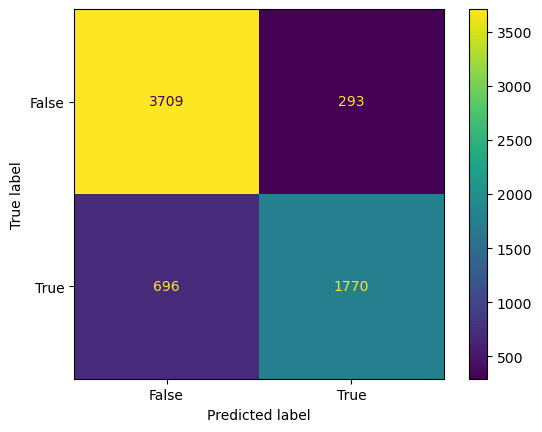

In [111]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, \
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
#sensitivity
TP / float(TP+FN)

0.7177615571776156

In [114]:
#specificity
TN / float(TN+FP)

0.9267866066966517

In [115]:
#false postive rate
print(FP/ float(TN+FP))

0.07321339330334832


In [116]:
# positive predictive value 
print (TP / float(TP+FP))

0.8579738245273874


In [117]:

accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
recall = metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
precision=metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)

Accuracy: 0.8470933828076685
Recall: 0.7177615571776156
Precision: 0.8579738245273874


In [118]:
#Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

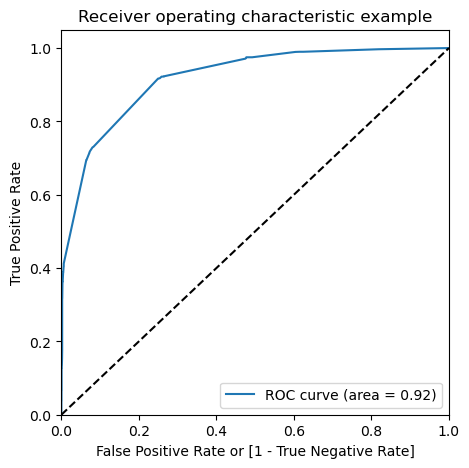

In [120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [121]:
#Finding Optimal Cutoff Point

In [122]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.015709,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.413113,6795,0,1,1,1,1,1,0,0,0,0,0
2,0,0.015709,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.063222,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.413113,3934,0,1,1,1,1,1,0,0,0,0,0


In [123]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.693568  0.974858  0.520240
0.2   0.2  0.806895  0.922952  0.735382
0.3   0.3  0.810297  0.922141  0.741379
0.4   0.4  0.813853  0.916869  0.750375
0.5   0.5  0.847093  0.717762  0.926787
0.6   0.6  0.846166  0.712895  0.928286
0.7   0.7  0.843537  0.694647  0.935282
0.8   0.8  0.764069  0.388483  0.995502
0.9   0.9  0.755257  0.363747  0.996502


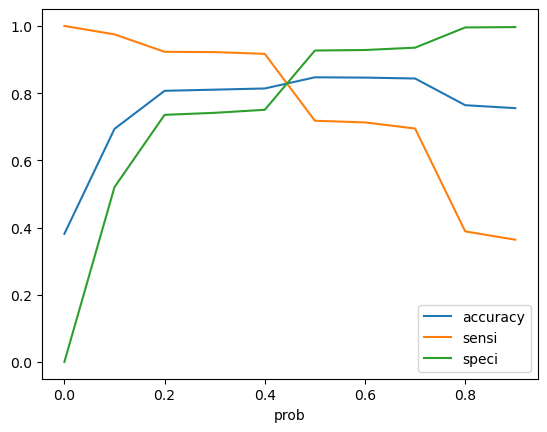

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### 
0.41 is the approx. point where all the curves meet, so 0.41 seems to be our Optimal cutoff point for probability threshold .
Mapping is done again using optimal cutoff point
### 

In [125]:
y_train_pred_final['Final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.41 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.015709,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.413113,6795,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.015709,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.063222,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.413113,3934,0,1,1,1,1,1,0,0,0,0,0,1


In [126]:
# Dropping the unwanted columns 
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Final_predicted
0,0,0.015709,1871,0
1,0,0.413113,6795,1
2,0,0.015709,3516,0
3,0,0.063222,8105,0
4,0,0.413113,3934,1


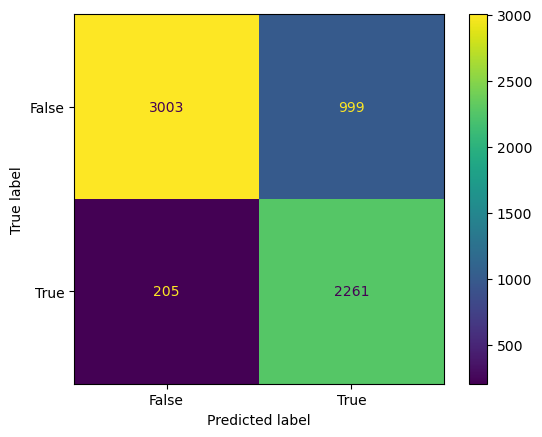

In [127]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_predicted )
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, \
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

In [128]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [129]:
#sensitivity
sensitivity=TP / float(TP+FN)
print('Sensitivity:', sensitivity)


Sensitivity: 0.9168694241686942


In [130]:
#specificity
Specificity = TN / float(TN+FP)
print('Specificity:', Specificity)


Specificity: 0.7503748125937032


In [131]:
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)
recall = metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)
precision=metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)

Accuracy: 0.8138528138528138
Recall: 0.9168694241686942
Precision: 0.693558282208589


### Assigning Lead Score

In [132]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Final_predicted,Lead_Score
0,0,0.015709,1871,0,2
1,0,0.413113,6795,1,41
2,0,0.015709,3516,0,2
3,0,0.063222,8105,0,6
4,0,0.413113,3934,1,41


### Step 10: Making predictions on the test set

In [133]:
#Scaling Test Dataset
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [134]:
X_test = X_test[col3]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Tags_in touch with EINS
4269,0,0,0,0,1,1,0,0,0,0,1,0
2376,1,0,0,0,1,1,0,0,0,0,1,0
7766,0,0,0,1,0,0,1,0,0,0,1,0
9199,0,0,0,0,0,1,0,0,0,0,0,0
4359,1,0,1,0,0,1,0,0,0,0,1,0


In [135]:
X_test_sm = sm.add_constant(X_test)

In [136]:
# making prediction using final model
y_test_pred = res.predict(X_test_sm)

In [137]:
y_test_pred[:10]

4269    0.748531
2376    0.958161
7766    0.948271
9199    0.003781
4359    0.844129
9186    0.748531
1631    0.413113
8963    0.413113
8007    0.143395
5324    0.748531
dtype: float64

In [138]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [139]:
y_pred_1.head()

,0
4269,0.748531
2376,0.958161
7766,0.948271
9199,0.003781
4359,0.844129


In [140]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1
...,...
8649,0
2152,1
7101,0
5331,0


In [141]:
#Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [142]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [143]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [144]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.748531
1,1,2376,0.958161
2,1,7766,0.948271
3,0,9199,0.003781
4,1,4359,0.844129


In [145]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [146]:
# Rearranging the columns
columns_titles = ['Prospect ID','Converted','Converted_prob']
y_pred_final=y_pred_final.reindex(columns=columns_titles)

In [147]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.41 else 0)

In [148]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,4269,1,0.748531,1
1,2376,1,0.958161,1
2,7766,1,0.948271,1
3,9199,0,0.003781,0
4,4359,1,0.844129,1


In [149]:
#check overall accuracy of Test model

In [150]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8102453102453102

In [151]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1235,  442],
       [  84, 1011]], dtype=int64)

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
#Sensitivity
TP / float(TP+FN)

0.9232876712328767

In [154]:
#Specificity
TN / float(TN+FP)

0.7364341085271318

In [156]:
#These matrics are closer to train set, Hence final model 5 has good consistency on both Train & Test set



###
Conclusion


Train Data Set:
Accuracy: 81.38%

Sensitivity: 91.68%

Specificity: 75.03%

Test Data Set:
Accuracy: 81.02%

Sensitivity: 92.32% 

Specificity: 73.64%
    
    ###